<h1 align='center', style='color: blue'>Credit score Project</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.float_format = '{:.2f}'.format

In [3]:
df_bureau = pd.read_csv(r"D:\software\notebooks\Supervised_learning\practice\codebasics\credit_score_project\data\bureau_data.csv")
df_customers = pd.read_csv(r"D:\software\notebooks\Supervised_learning\practice\codebasics\credit_score_project\data\customers.csv")
df_loans = pd.read_csv(r"D:\software\notebooks\Supervised_learning\practice\codebasics\credit_score_project\data\loans.csv")

In [4]:
df_bureau.shape, df_customers.shape, df_loans.shape

((50000, 8), (50000, 12), (50000, 15))

### Merging the dataset into one

In [5]:
df = pd.merge(df_bureau, df_customers, on='cust_id')
df = pd.merge(df, df_loans, on='cust_id')

df.shape

(50000, 33)

### Splitting dataset

* The dataset is being split to avoid any data leakage of test dataset into training dataset

In [6]:
from sklearn.model_selection import train_test_split


In [7]:
X = df.drop('default', axis=1)
y = df['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [8]:
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

In [9]:
df_train.shape, df_test.shape

((35000, 33), (15000, 33))

### Changing column value

* Boolean value to integer

In [10]:
df_train['default'] = df_train['default'].astype(int)
df_test['default'] = df_test['default'].astype(int)

<h1 align = 'center', style = 'color: blue'>Explotary Data Analysis</h1>

### Splitting numerical columns and catagorical columns

In [11]:
numerical_cols = df.select_dtypes(exclude='object').columns.to_list()

catagorical_cols = df.select_dtypes(include='object').columns.to_list()

### Analysing numerical columns

* Looking for empty values and filling them up if any

In [12]:
# No empty values
# If looked upon closely some of the features do not represent 
# continuous values even if they are represented by numbers
# such as: zipcode, default

df_train[numerical_cols].isna().sum()

number_of_open_accounts        0
number_of_closed_accounts      0
total_loan_months              0
delinquent_months              0
total_dpd                      0
enquiry_count                  0
credit_utilization_ratio       0
age                            0
income                         0
number_of_dependants           0
years_at_current_address       0
zipcode                        0
sanction_amount                0
loan_amount                    0
processing_fee                 0
gst                            0
net_disbursement               0
loan_tenure_months             0
principal_outstanding          0
bank_balance_at_application    0
default                        0
dtype: int64

In [13]:
numerical_cols = [
 'number_of_open_accounts',
 'number_of_closed_accounts',
 'total_loan_months',
 'delinquent_months',
 'total_dpd',
 'enquiry_count',
 'credit_utilization_ratio',
 'age',
 'income',
 'number_of_dependants',
 'years_at_current_address',
 'sanction_amount',
 'loan_amount',
 'processing_fee',
 'gst',
 'net_disbursement',
 'loan_tenure_months',
 'principal_outstanding',
 'bank_balance_at_application']

catagorical_cols = [
 'cust_id',
 'gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'loan_id',
 'loan_purpose',
 'loan_type',
 'disbursal_date',
 'installment_start_dt',
 'zipcode',
 'default']

### Lookling into catagorical columns

In [14]:
df_train[catagorical_cols].isna().sum()

cust_id                  0
gender                   0
marital_status           0
employment_status        0
residence_type          46
city                     0
state                    0
loan_id                  0
loan_purpose             0
loan_type                0
disbursal_date           0
installment_start_dt     0
zipcode                  0
default                  0
dtype: int64

In [15]:
df_test[catagorical_cols].isna().sum()

cust_id                  0
gender                   0
marital_status           0
employment_status        0
residence_type          16
city                     0
state                    0
loan_id                  0
loan_purpose             0
loan_type                0
disbursal_date           0
installment_start_dt     0
zipcode                  0
default                  0
dtype: int64

In [16]:
# We have found out some empty values. These values are small relative to the size of the dataset
# Either these empty values can be dropped or filled in
# we will be filling with the mode value of the data

mode_val = df_train['residence_type'].mode()[0]

df_train['residence_type'] = df_train['residence_type'].fillna(mode_val)
df_test['residence_type'] = df_test['residence_type'].fillna(mode_val)

df_test['residence_type'].isna().sum(), df_train['residence_type'].isna().sum()

# No empty values 

(0, 0)

### Looking for flawed catagorical values

* Filling up for the flawed values if any

In [17]:
for col in catagorical_cols:
    print(f"{col} ---> {df_train[col].unique()}\n")

cust_id ---> ['C29672' 'C48134' 'C02873' ... 'C17746' 'C17932' 'C45920']

gender ---> ['M' 'F']

marital_status ---> ['Married' 'Single']

employment_status ---> ['Salaried' 'Self-Employed']

residence_type ---> ['Rented' 'Owned' 'Mortgage']

city ---> ['Chennai' 'Lucknow' 'Pune' 'Ahmedabad' 'Bangalore' 'Delhi' 'Hyderabad'
 'Kolkata' 'Mumbai' 'Jaipur']

state ---> ['Tamil Nadu' 'Uttar Pradesh' 'Maharashtra' 'Gujarat' 'Karnataka' 'Delhi'
 'Telangana' 'West Bengal' 'Rajasthan']

loan_id ---> ['L29672' 'L48134' 'L02873' ... 'L17746' 'L17932' 'L45920']

loan_purpose ---> ['Home' 'Personal' 'Auto' 'Education' 'Personaal']

loan_type ---> ['Secured' 'Unsecured']

disbursal_date ---> ['2022-07-11' '2024-05-15' '2019-11-06' ... '2021-03-06' '2020-09-30'
 '2019-09-08']

installment_start_dt ---> ['2022-07-13' '2024-05-21' '2019-11-29' ... '2024-08-13' '2019-07-28'
 '2024-08-20']

zipcode ---> [600001 226001 411001 380001 560001 110001 500001 700001 400001 302001]

default ---> [1 0]



In [18]:
### In loan purpose there is some inconsistency

df_train['loan_purpose'] = df_train['loan_purpose'].replace('Personaal', 'Personal')
df_test['loan_purpose'] = df_test['loan_purpose'].replace('Personaal', 'Personal')

In [19]:
for col in catagorical_cols:
    print(f"{col} ---> {df_train[col].unique()}\n")

cust_id ---> ['C29672' 'C48134' 'C02873' ... 'C17746' 'C17932' 'C45920']

gender ---> ['M' 'F']

marital_status ---> ['Married' 'Single']

employment_status ---> ['Salaried' 'Self-Employed']

residence_type ---> ['Rented' 'Owned' 'Mortgage']

city ---> ['Chennai' 'Lucknow' 'Pune' 'Ahmedabad' 'Bangalore' 'Delhi' 'Hyderabad'
 'Kolkata' 'Mumbai' 'Jaipur']

state ---> ['Tamil Nadu' 'Uttar Pradesh' 'Maharashtra' 'Gujarat' 'Karnataka' 'Delhi'
 'Telangana' 'West Bengal' 'Rajasthan']

loan_id ---> ['L29672' 'L48134' 'L02873' ... 'L17746' 'L17932' 'L45920']

loan_purpose ---> ['Home' 'Personal' 'Auto' 'Education']

loan_type ---> ['Secured' 'Unsecured']

disbursal_date ---> ['2022-07-11' '2024-05-15' '2019-11-06' ... '2021-03-06' '2020-09-30'
 '2019-09-08']

installment_start_dt ---> ['2022-07-13' '2024-05-21' '2019-11-29' ... '2024-08-13' '2019-07-28'
 '2024-08-20']

zipcode ---> [600001 226001 411001 380001 560001 110001 500001 700001 400001 302001]

default ---> [1 0]



### Dropping some columns
* Dropping some columns such as dates and IDs
* First step is to make copies of the datasets

In [20]:
df_train_1 = df_train.copy()
df_test_1 = df_test.copy()

In [21]:
df_train_1.shape

(35000, 33)

In [22]:
df_train_1 = df_train_1.drop(['cust_id', 'loan_id', 'installment_start_dt', 'disbursal_date'], axis=1)
df_test_1 = df_test_1.drop(['cust_id', 'loan_id', 'installment_start_dt', 'disbursal_date'], axis=1)

df_train_1.shape, df_test_1.shape

((35000, 29), (15000, 29))

<h1 align = 'center', style= 'color: blue'>Data Visualisation</h1>

### Numerical columns

* Boxplot

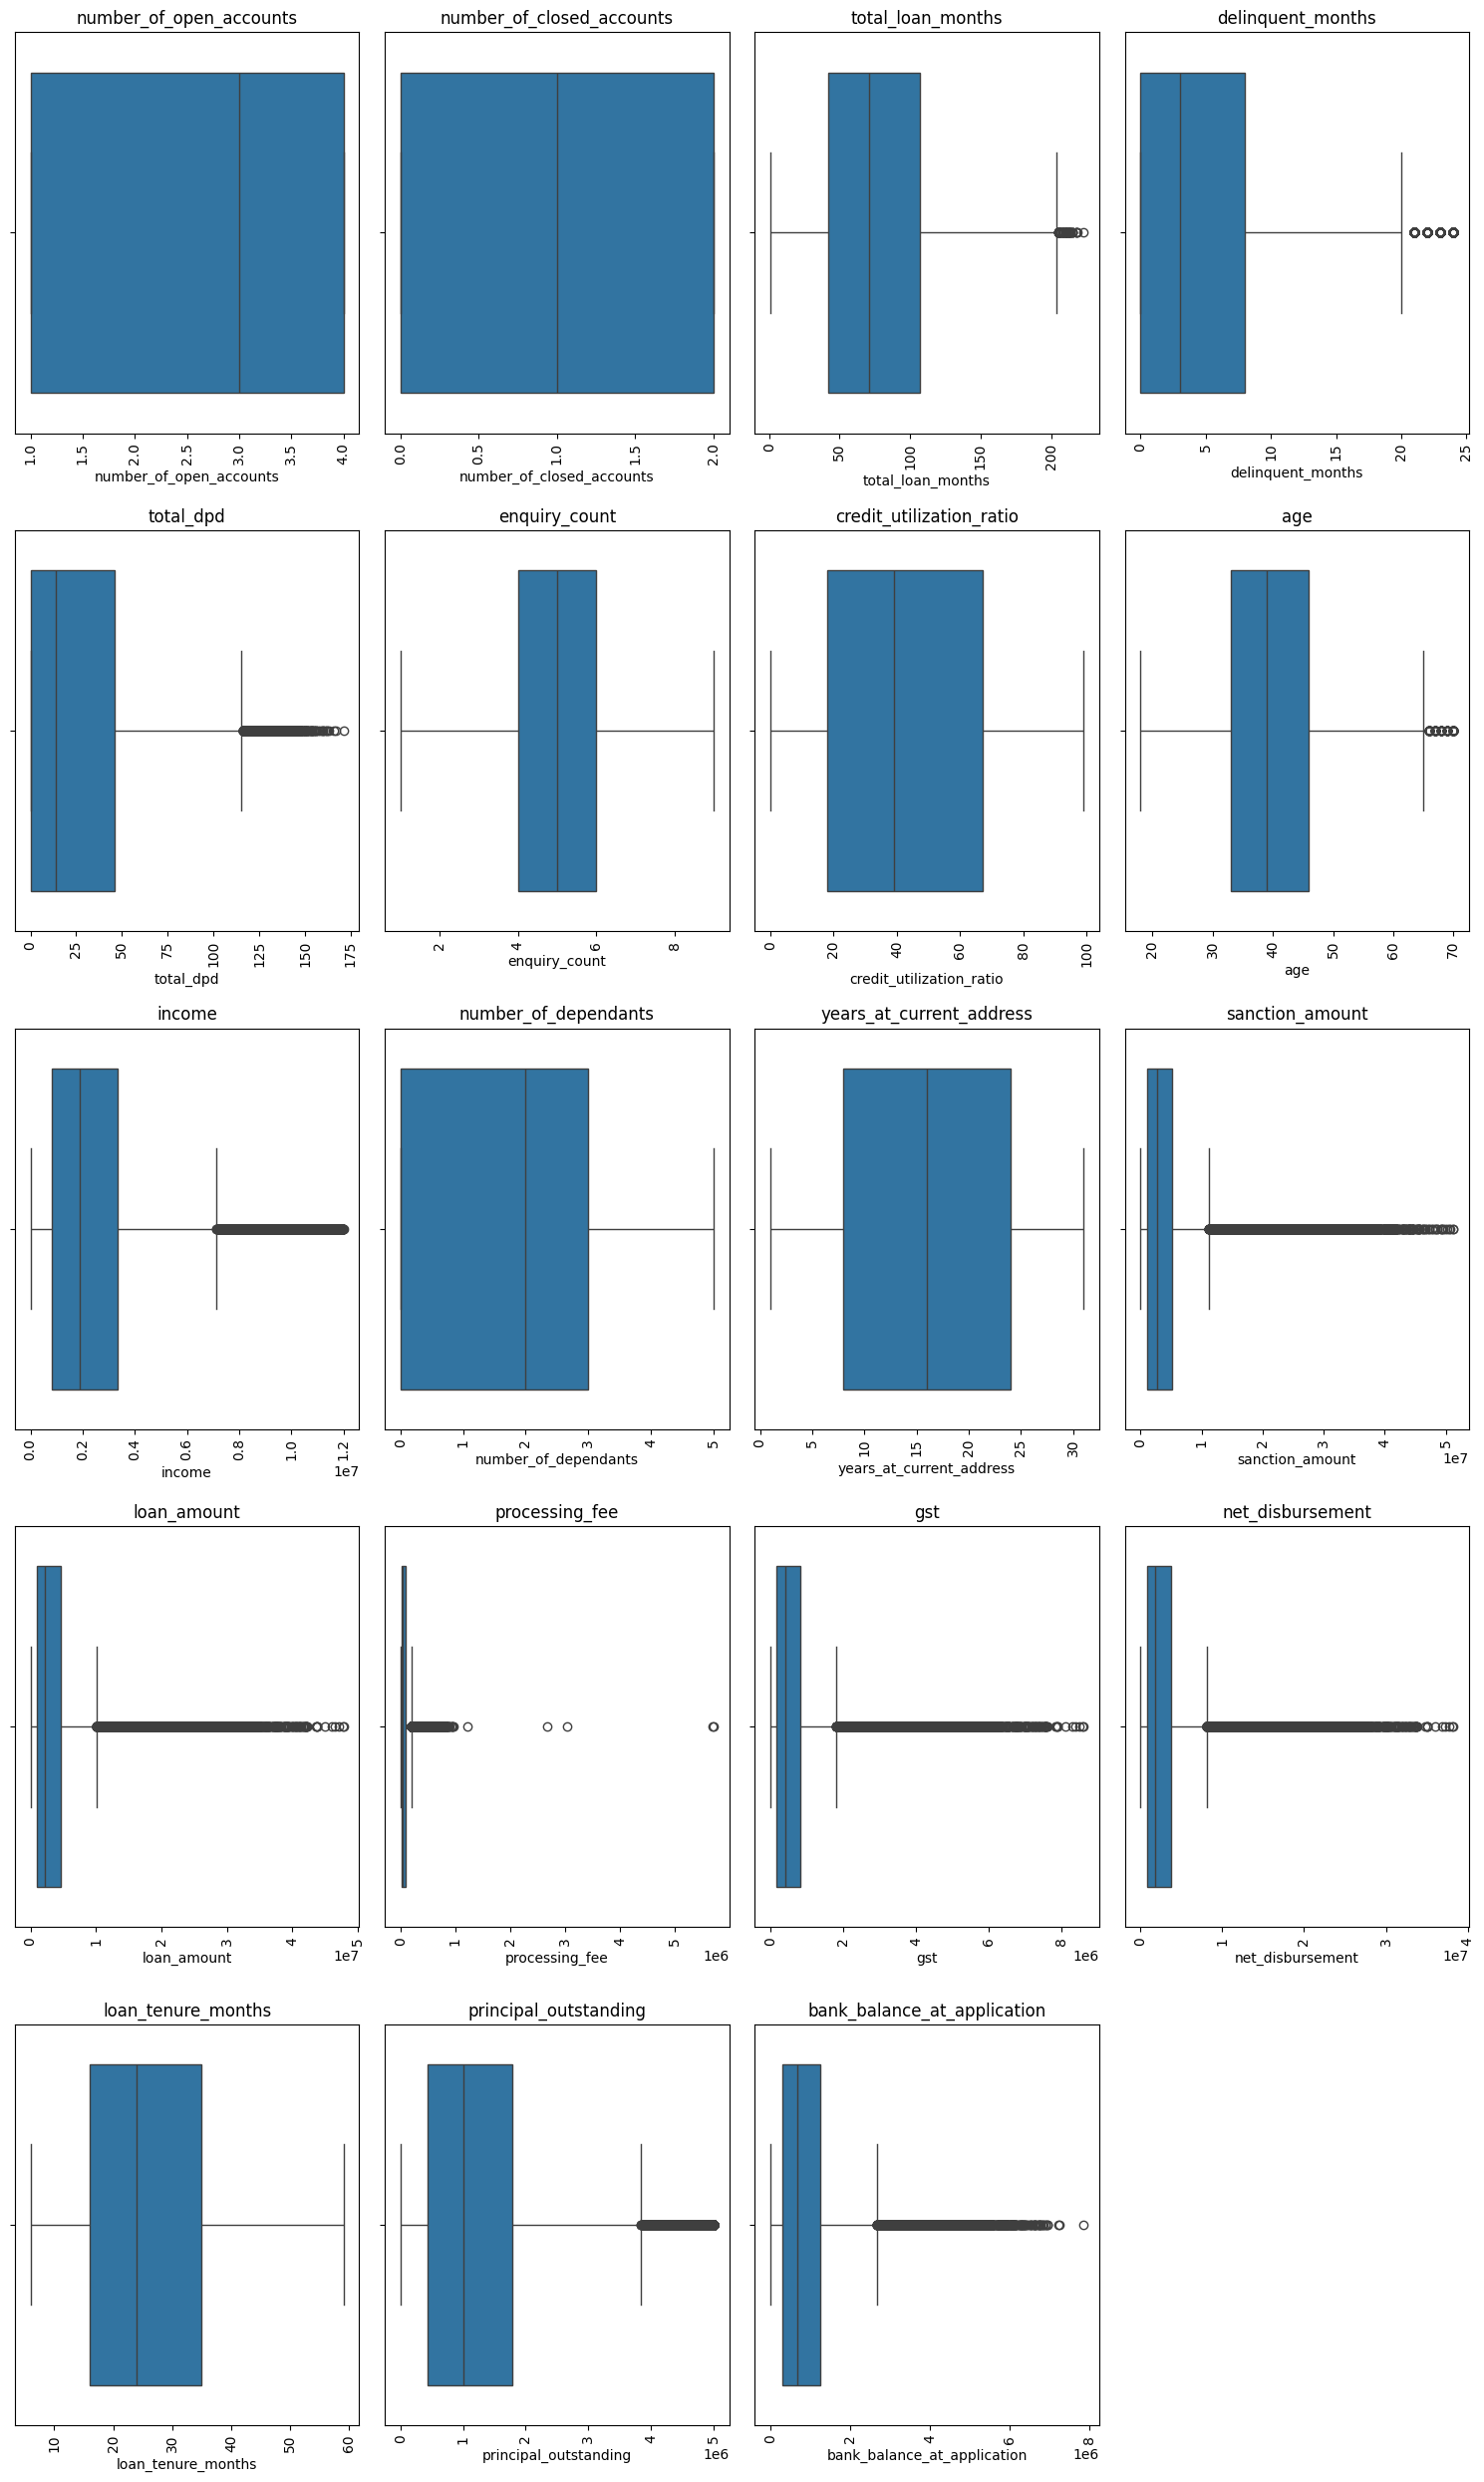

In [23]:
import math

# Determine the grid size
num_cols = len(numerical_cols)
cols_per_row = 4  # Adjust the number of columns per row as needed
num_rows = math.ceil(num_cols / cols_per_row)

# Create the grid of subplots
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(15, num_rows * 5))
axes = axes.flatten()  # Flatten to make indexing easier

# Plot each column in the grid
for i, col in enumerate(numerical_cols):
    sns.boxplot(data=df_train_1, x=col, ax=axes[i])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=90)

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


* Histograms

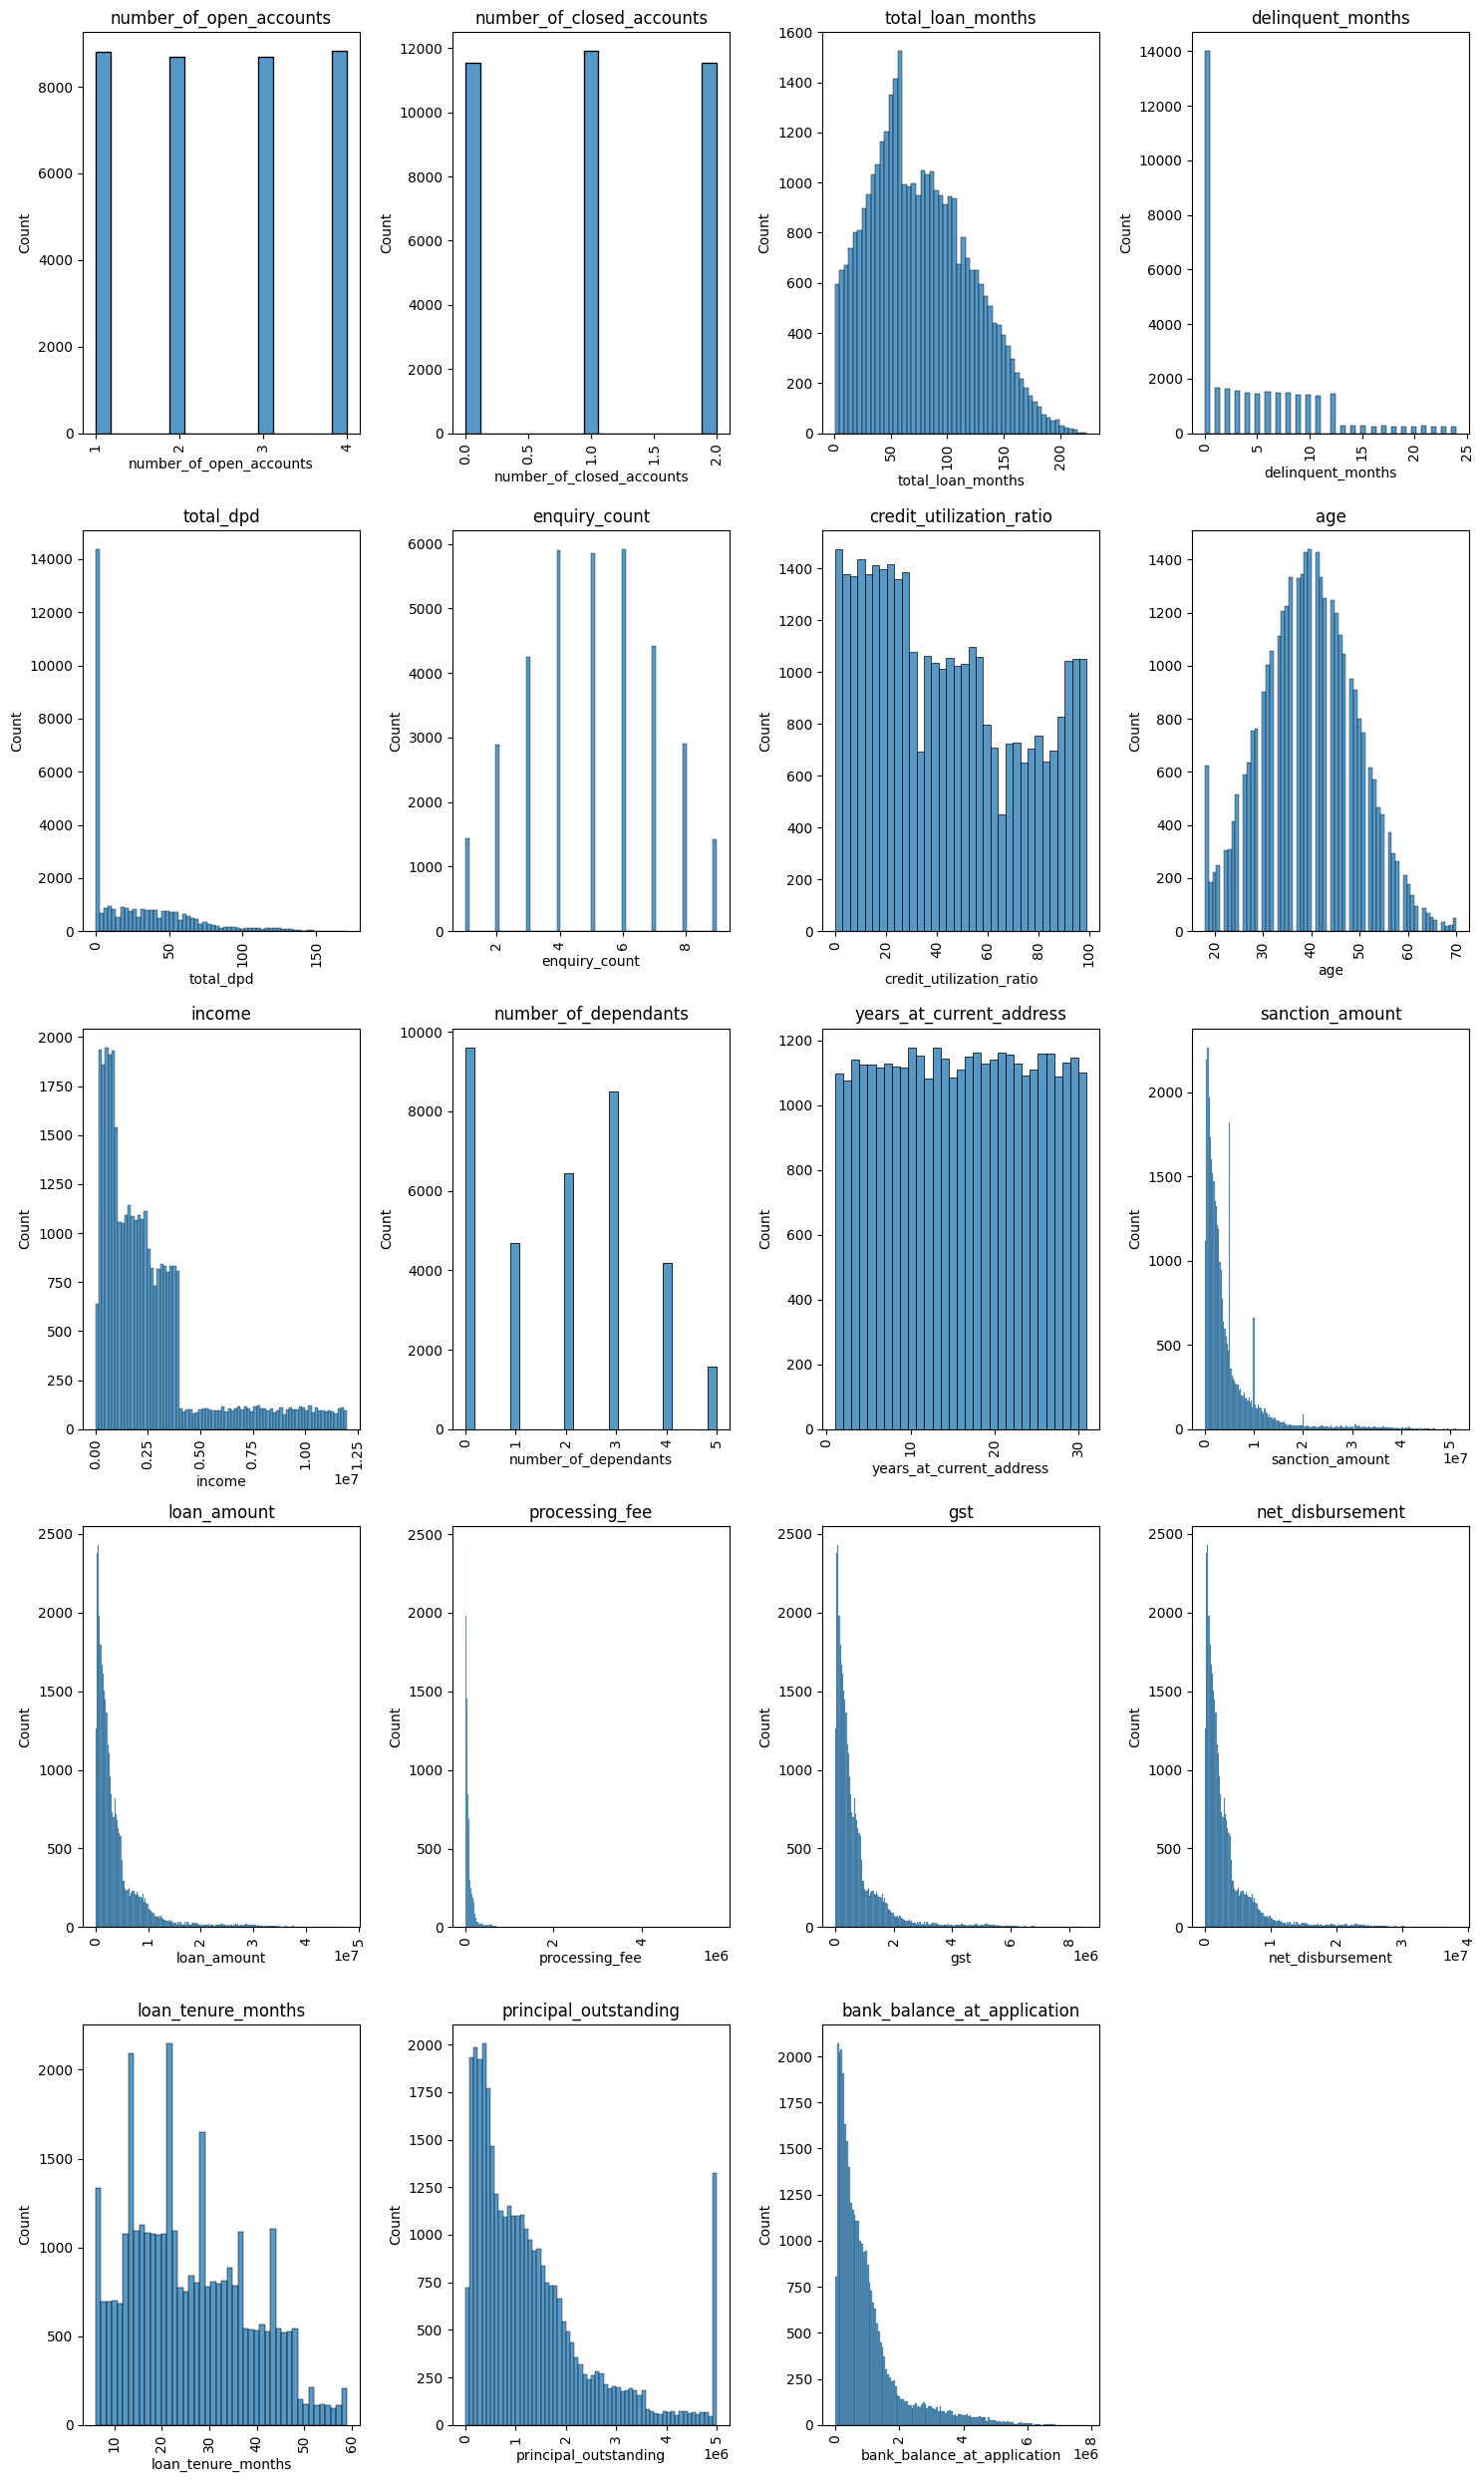

In [24]:
import math

# Determine the grid size
num_cols = len(numerical_cols)
cols_per_row = 4  # Adjust the number of columns per row as needed
num_rows = math.ceil(num_cols / cols_per_row)

# Create the grid of subplots
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(15, num_rows * 5))
axes = axes.flatten()  # Flatten to make indexing easier

# Plot each column in the grid
for i, col in enumerate(numerical_cols):
    sns.histplot(data=df_train_1, x=col, ax=axes[i])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=90)

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


Insight:
* Upon realisation we will look into 'processing fee', 'gst' and 'net disbursement'

* Looking into processing fee data

In [25]:
df_train_1.processing_fee.describe()

# We will look into the max value

count     35000.00
mean      80691.67
std      117758.93
min           0.00
25%       19440.00
50%       44700.00
75%       92460.00
max     5698029.90
Name: processing_fee, dtype: float64

In [26]:
# The following index has the max value for processing fee
# The processing fee is more than the loan amount therefore we will be looking into more such values

df_train_1[df_train_1['processing_fee'] == df_train_1['processing_fee'].max()][['processing_fee','loan_amount']]

,processing_fee,loan_amount
12294,5698029.90,4639000


In [27]:
# Looking into processing fee more than the loan amount

df_train_1[df_train_1['loan_amount'] < df_train_1['processing_fee']][['processing_fee','loan_amount']]

,processing_fee,loan_amount
12294,5698029.90,4639000
28174,1214492.67,966000
23981,2669791.02,2234000
29305,3036378.01,2616000
33705,5678020.86,3812000


In [28]:
# It has been revealed that processing fee should not be more than 3%
# Data is the same as the above column
# We will be ignoring such data

df_train_1[df_train_1['processing_fee']/df_train_1['loan_amount'] > 0.03][['processing_fee','loan_amount']]

,processing_fee,loan_amount
12294,5698029.90,4639000
28174,1214492.67,966000
23981,2669791.02,2234000
29305,3036378.01,2616000
33705,5678020.86,3812000


In [29]:
df_train_1 = df_train_1[df_train_1['processing_fee']/df_train_1['loan_amount'] <= 0.03]

* Looking into test data and removing similar anomalies

In [30]:
df_test_1[df_test_1['loan_amount'] < df_test_1['processing_fee']][['processing_fee','loan_amount']]

,processing_fee,loan_amount
9898,5293543.52,3626000
47089,1858964.77,1738000


In [31]:
df_test_1[df_test_1['processing_fee']/df_test_1['loan_amount'] > 0.03][['processing_fee','loan_amount']]

,processing_fee,loan_amount
9898,5293543.52,3626000
47089,1858964.77,1738000


In [32]:
# fixing test dataset

df_test_1 = df_test_1[df_test_1['processing_fee']/df_test_1['loan_amount'] <= 0.03]

* Looking into GST data for both train and test dataset

In [33]:
df_train_1[df_train_1['gst']/df_train_1['loan_amount'] > 0.18]

# The max GST is 18% and there is no data exceeding it

,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,age,gender,marital_status,...,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,default


In [34]:
df_test_1[df_test_1['gst']/df_test_1['loan_amount'] > 0.18]

,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,age,gender,marital_status,...,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,default


* Looking into net disbursement data

In [35]:
df_train_1['net_disbursement'].describe()

count      34992.00
mean     3207489.39
std      4307087.85
min        40000.00
25%       777600.00
50%      1788000.00
75%      3698400.00
max     38255200.00
Name: net_disbursement, dtype: float64

In [36]:
# The max net disbursement 

df_train_1[df_train_1['net_disbursement'] == df_train_1['net_disbursement'].max()][['net_disbursement', 'loan_amount']]

,net_disbursement,loan_amount
49413,38255200,47819000


In [37]:
# There is no net disbursement greater than loan amount

df_train_1[df_train_1['loan_amount'] < df_train_1['net_disbursement']]

,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,age,gender,marital_status,...,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,default


In [38]:
df_test_1[df_test_1['loan_amount'] < df_test_1['net_disbursement']]

,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,age,gender,marital_status,...,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,default


* Moving to catagorical columns

# Catagorical columns

In [39]:
catagorical_cols

# Removing some of the columns that have been removed

catagorical_cols = [
 'gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'loan_purpose',
 'loan_type',
 'zipcode',
 'default']

* Histograms

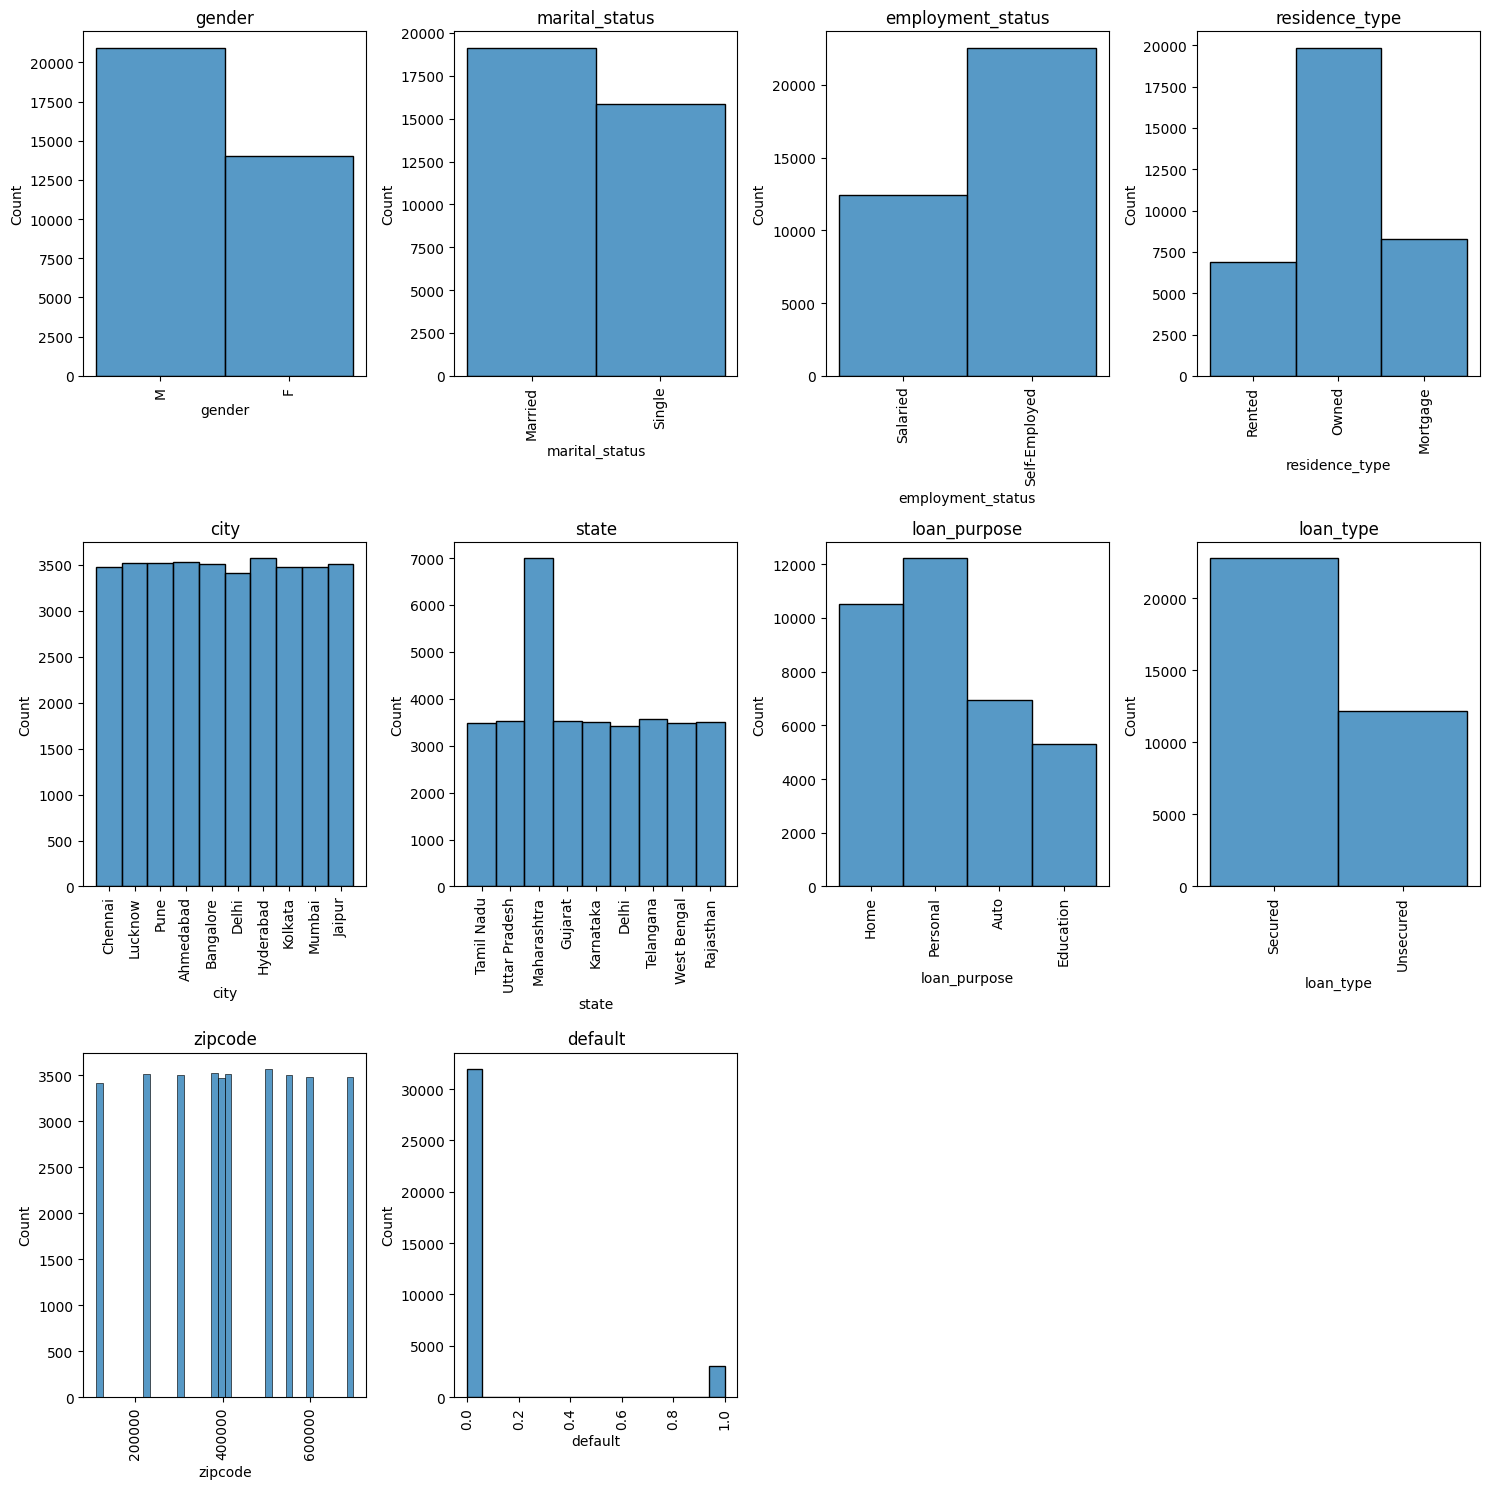

In [40]:
import math

# Determine the grid size
num_cols = len(catagorical_cols)
cols_per_row = 4  # Adjust the number of columns per row as needed
num_rows = math.ceil(num_cols / cols_per_row)

# Create the grid of subplots
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(15, num_rows * 5))
axes = axes.flatten()  # Flatten to make indexing easier

# Plot each column in the grid
for i, col in enumerate(catagorical_cols):
    sns.histplot(data=df_train_1, x=col, ax=axes[i]
                )
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=90)

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


Insight:
* There is class imbablance in default column that will need some attention

<h1 align = 'center', style = 'color: blue'>Adding some better calculation matrics columnns to the data</h1>

Following columns are revealed to be useful matrics:
* Loan to income ratio
* Delinquent months to loan months
* Average DPD per month

### Loan to income ratio
* We will start with making copies first

In [41]:
df_train_2 = df_train_1.copy()
df_test_2 = df_test_1.copy()

In [42]:
df_train_2['loan_to_income'] = df_train_2['loan_amount']/df_train_2['income']
df_test_2['loan_to_income'] = df_test_2['loan_amount']/df_test_2['income']

# Checking null values
df_train_2['loan_to_income'].isnull().sum(), df_test_2['loan_to_income'].isnull().sum()

(0, 0)

### Delinquency ratio

In [43]:
df_train_2['delinquency_ratio'] = df_train_2['delinquent_months']/df_train_2['loan_tenure_months']
df_test_2['delinquency_ratio'] = df_test_2['delinquent_months']/df_test_2['loan_tenure_months']

# Checking null values
df_train_2['delinquency_ratio'].isnull().sum(), df_test_2['delinquency_ratio'].isnull().sum()

(0, 0)

### Average DPD per month

In [44]:
df_train_2['average_dpd'] = np.where(
    df_train_2['delinquent_months'] != 0,
    df_train_2['total_dpd']/df_train_2['delinquent_months'],
0)

df_test_2['average_dpd'] = np.where(
    df_test_2['delinquent_months'] != 0,
    df_test_2['total_dpd']/df_test_2['delinquent_months'],
0)

# Checking null values

df_train_2['average_dpd'].isnull().sum(), df_test_2['average_dpd'].isnull().sum()

(0, 0)

<h1 align = 'center', style = 'color: blue'>Relationship of target with rest of the data</h1>

* We will plot kde plot for all the columns with respect to the target column (default)
* Adjusting numerical column

In [45]:
numerical_cols = [
 'number_of_open_accounts',
 'number_of_closed_accounts',
 'total_loan_months',
 'delinquent_months',
 'total_dpd',
 'enquiry_count',
 'credit_utilization_ratio',
 'age',
 'income',
 'number_of_dependants',
 'years_at_current_address',
 'sanction_amount',
 'loan_amount',
 'processing_fee',
 'gst',
 'net_disbursement',
 'loan_tenure_months',
 'principal_outstanding',
 'bank_balance_at_application',
 'loan_to_income',
 'delinquency_ratio',
 'average_dpd']

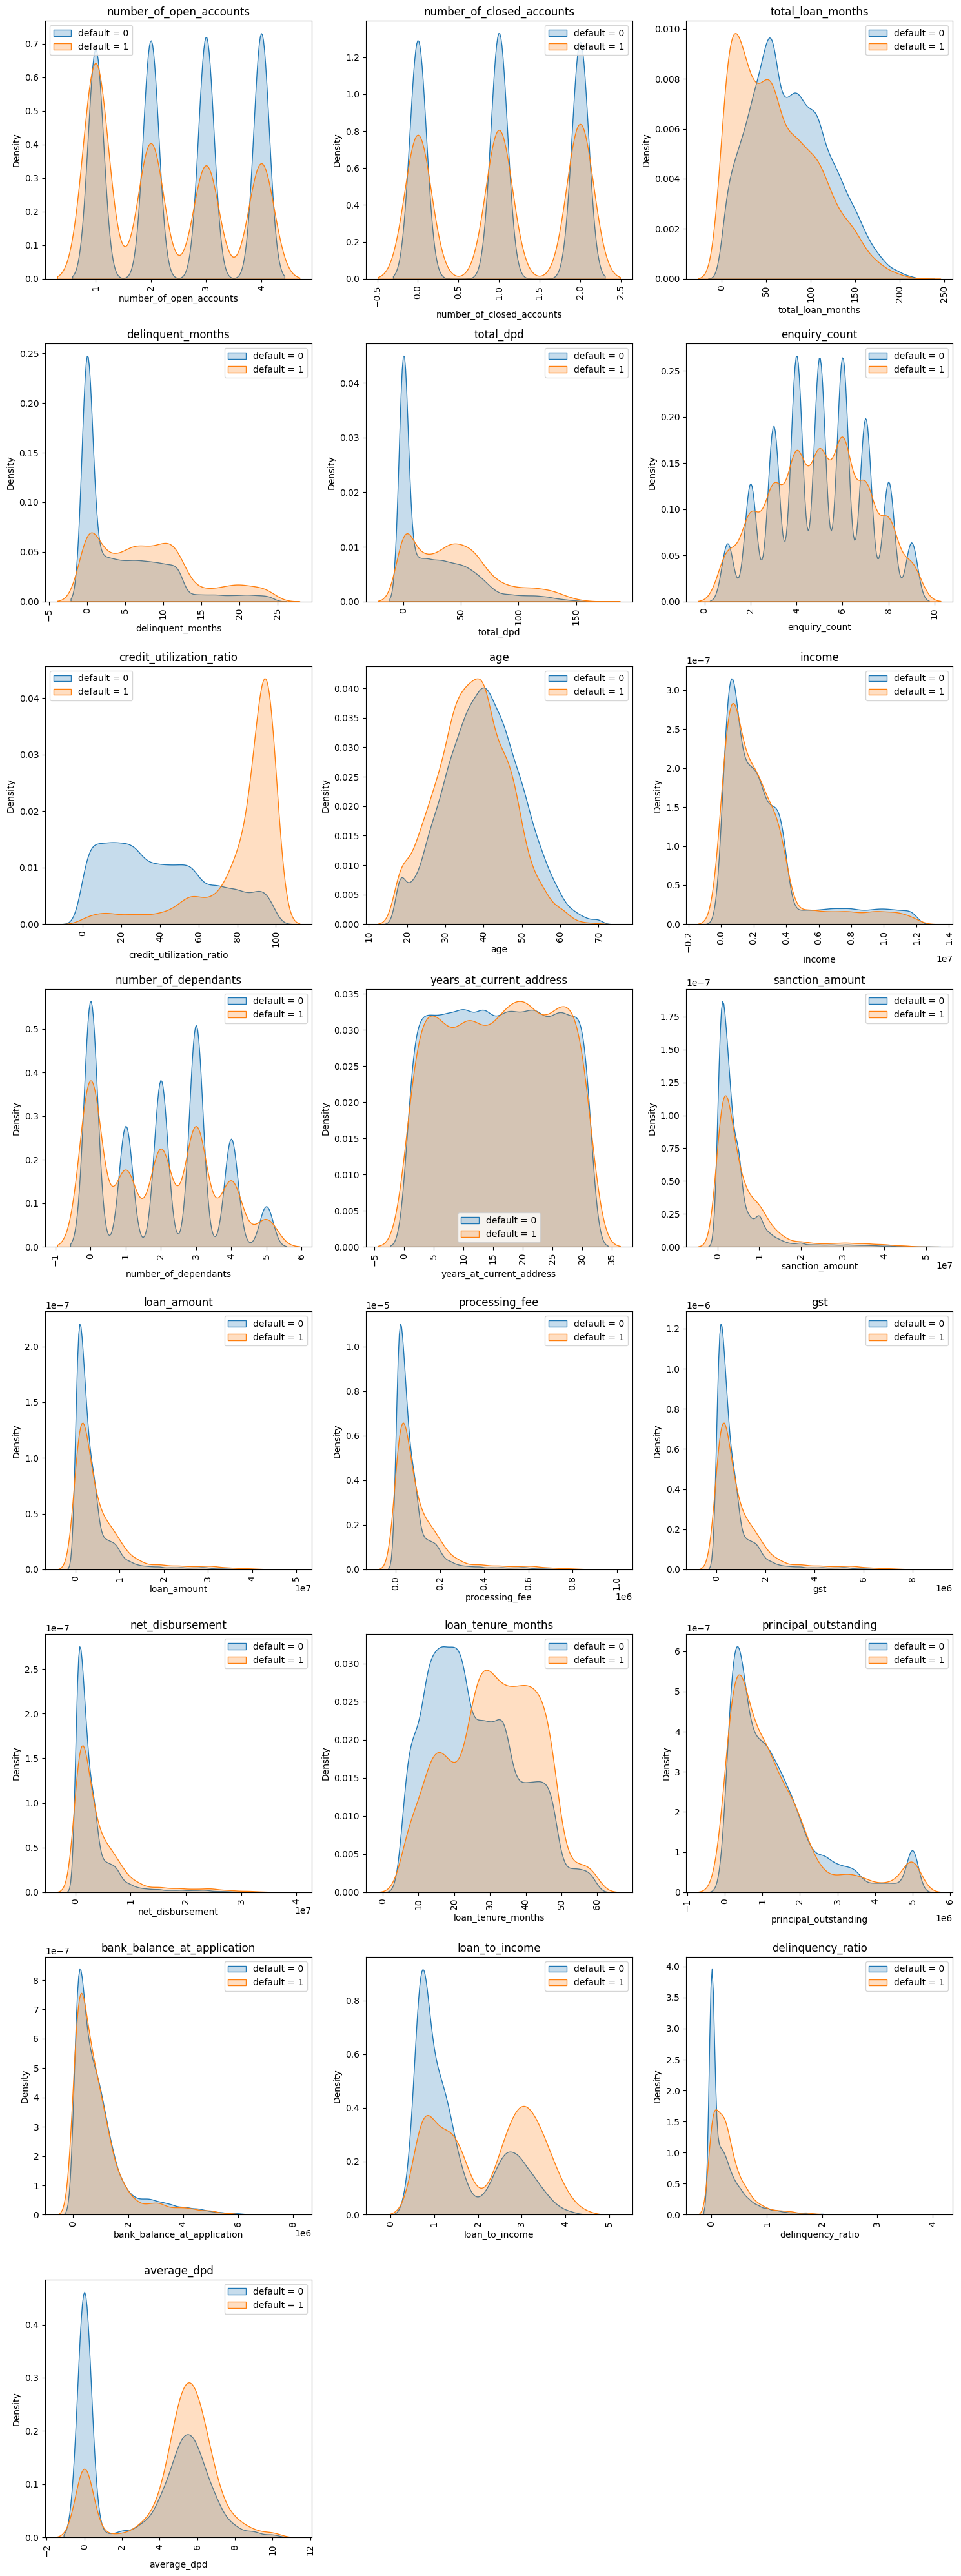

In [46]:
import math

# Determine the grid size
num_cols = len(numerical_cols)
cols_per_row = 3  # Adjust the number of columns per row as needed
num_rows = math.ceil(num_cols / cols_per_row)

# Create the grid of subplots
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(15, num_rows * 5))
axes = axes.flatten()  # Flatten to make indexing easier

# Plot each column in the grid
for i, col in enumerate(numerical_cols):
    sns.kdeplot(
        df_train_2[df_train_2['default'] == 0][col], 
        fill=True, 
        label='default = 0', 
        ax=axes[i]
    )
    sns.kdeplot(
        df_train_2[df_train_2['default'] == 1][col], 
        fill=True, 
        label='default = 1', 
        ax=axes[i]
    )
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=90)

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Add legends to each subplot
for ax in axes:
    if ax.get_visible():  # Only add legend to visible subplots
        ax.legend()

plt.tight_layout()
plt.show()

Insights:
1. The higher loan tenure months has higher chances of defaulting
2. A higher credit utilisation ratio definitely contributes to defaulting
3. The younger people seem to have a positive correlation with defaulting
4. There is some correlation between defaulting and total dpd same with delinquent months
5. Higher average dpd, delinquency ratio and loan to income ratio has higer chances for defaulting

# Removing some data

* Some of the data has been revealed to be removed
* Making copies

In [47]:
cols_to_drop = ['loan_amount','income','total_loan_months','delinquent_months','total_dpd']

df_train_3 = df_train_2.copy()
df_test_3 = df_test_2.copy()

In [48]:
df_train_3 = df_train_3.drop(cols_to_drop, axis=1)
df_test_3 = df_test_3.drop(cols_to_drop, axis=1)

In [49]:
df_train_3.shape, df_test_3.shape

((34992, 27), (14993, 27))

<h1 align = 'center', style = 'color: blue'>Variance Inflation Factor</h1>

# We will start by understanding correlation in data

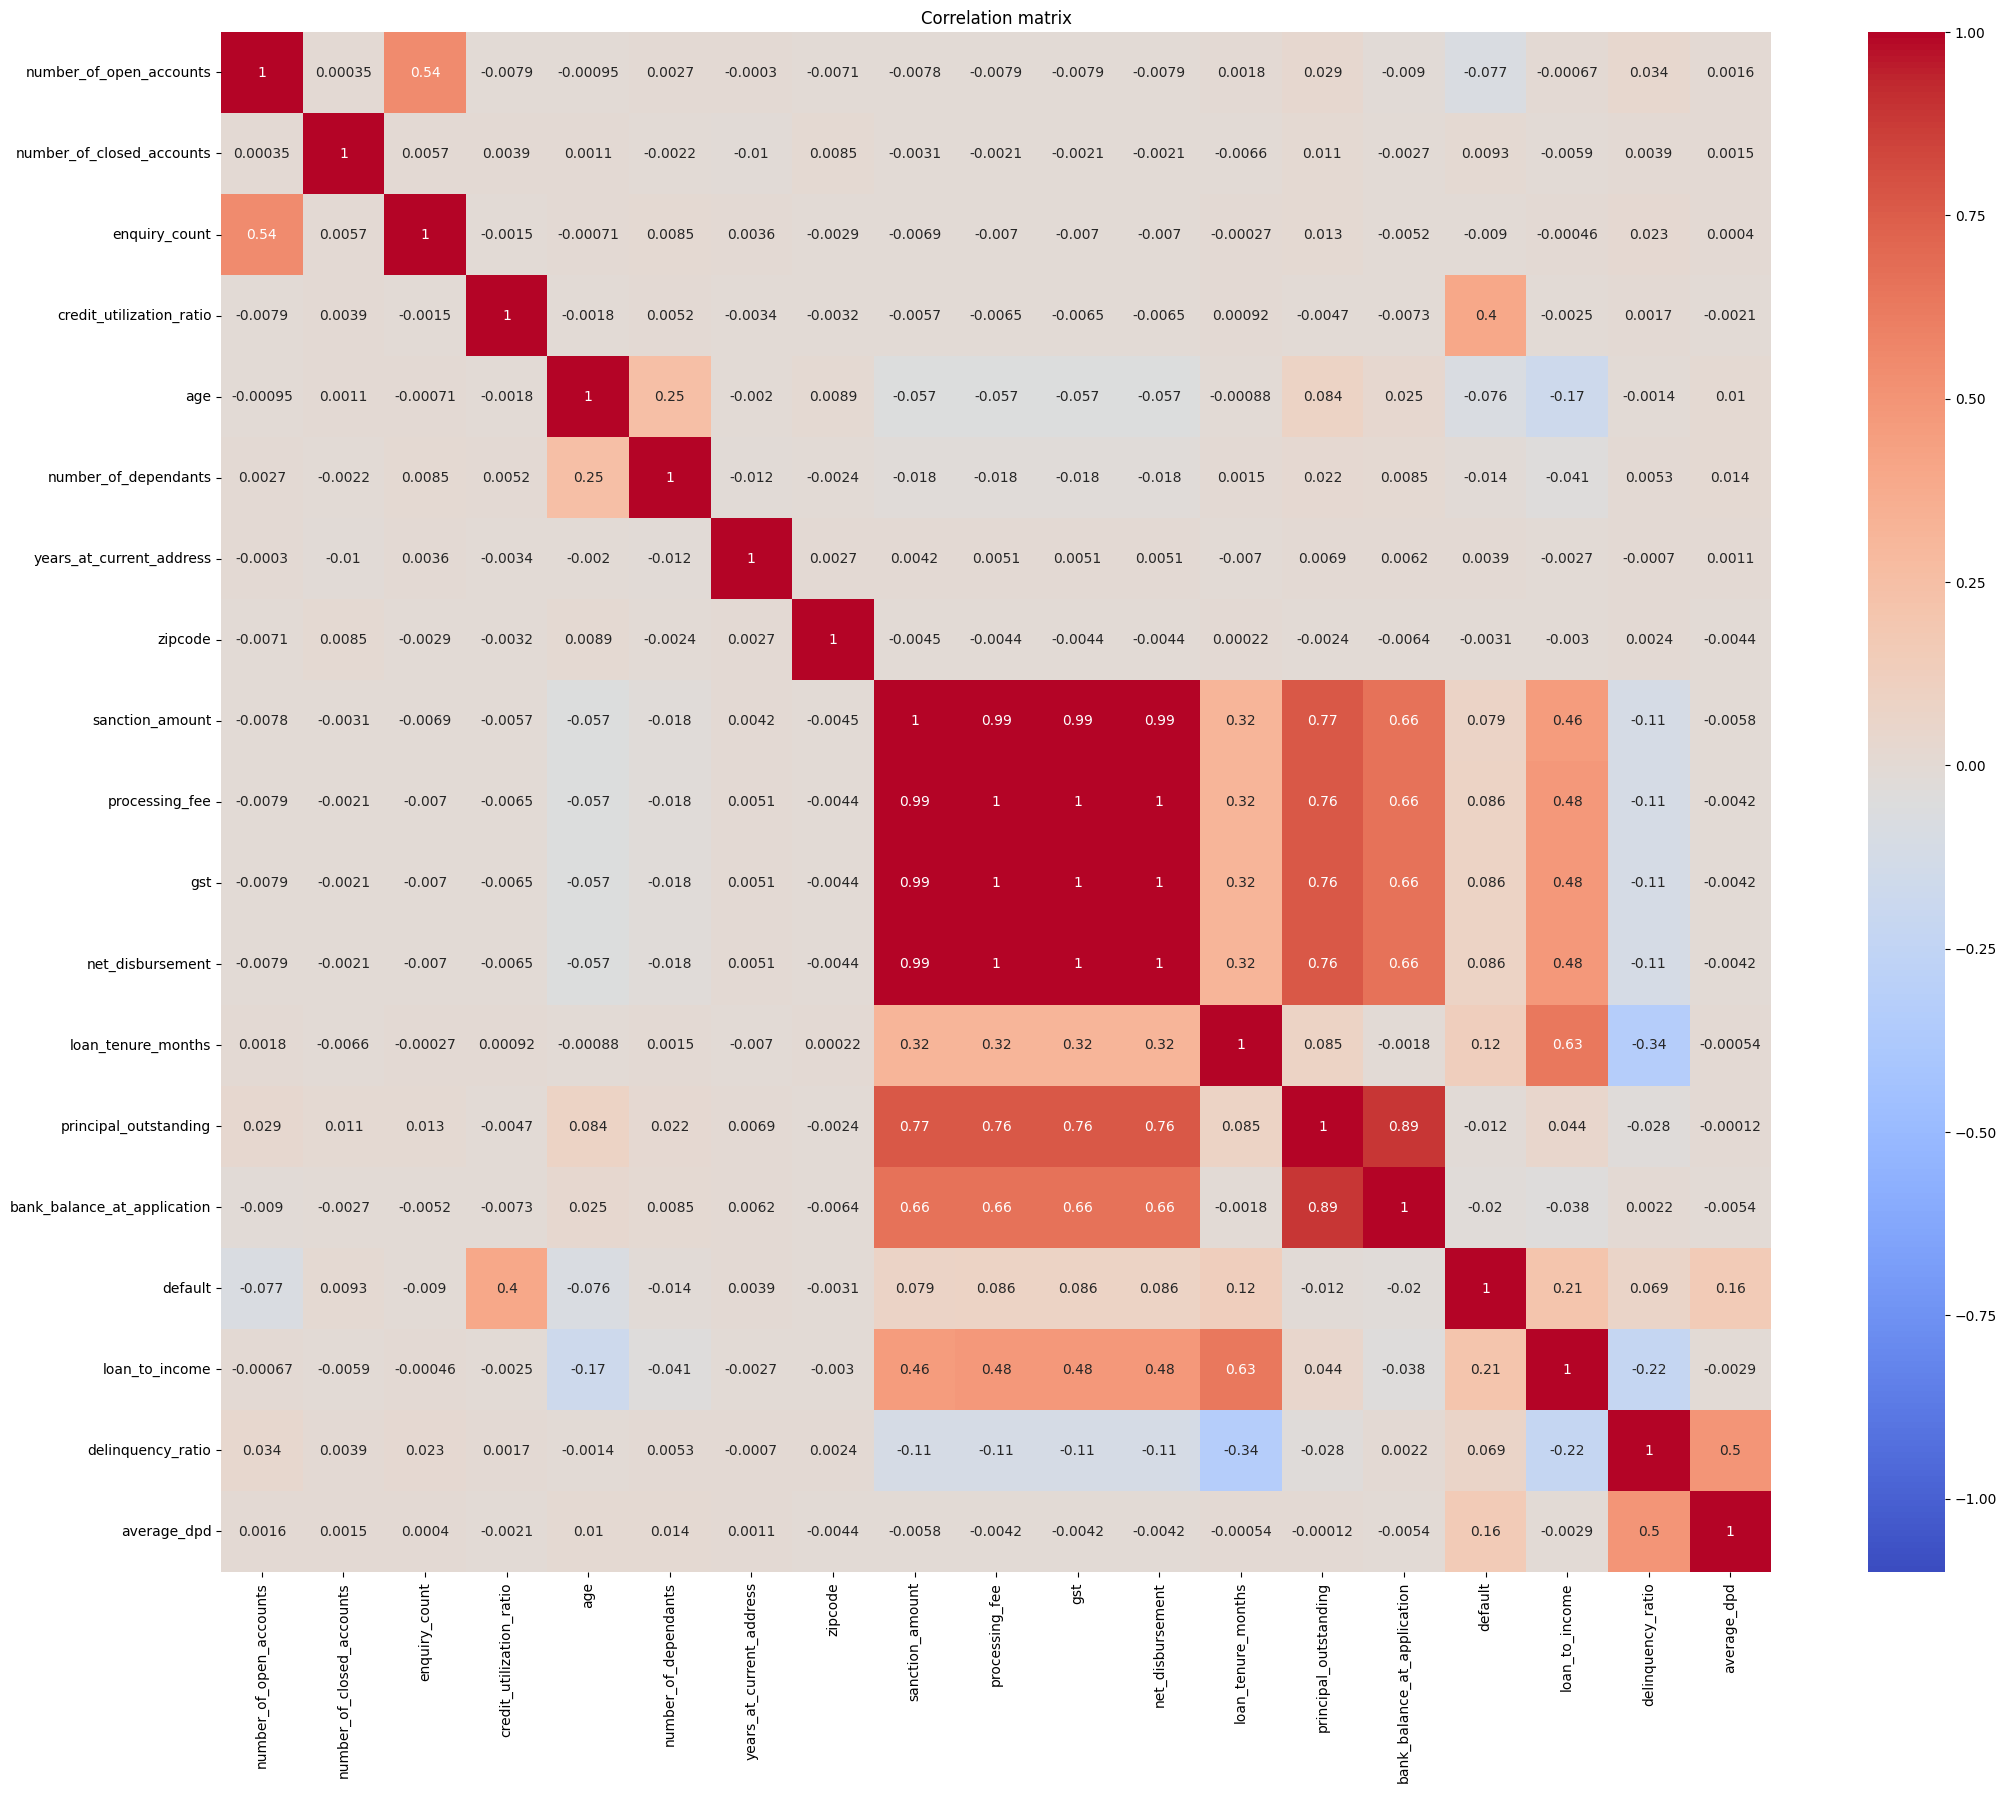

In [50]:
# Creating correlation matrix
correl_columns = df_train_3.select_dtypes(exclude=object).columns.to_list()
correl_data = df_train_3[correl_columns]
correl_matrix = correl_data.corr()

plt.figure(figsize=(25,20))
sns.heatmap(correl_matrix, cmap='coolwarm',annot=True, vmin=1, vmax=-1)
plt.title('Correlation matrix')
plt.show()

# We will now get VIF data
* Our approach will be to train a linear regression model, calculate r^2 and find VIF

In [51]:
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

* Calculating VIF manually

In [52]:
def get_vif(correl_columns, correl_data):
    VIF_data = {}
    
    for feature in correl_columns:
        X = correl_data.drop(feature, axis=1)
        y = correl_data[feature]
    
        model = LinearRegression()
        model.fit(X,y)
    
        # model.score() gives r^2 (coefficient of determination)
        r_squared = model.score(X,y)
    
        if r_squared != 1:
            vif = 1/(1-r_squared)
            VIF_data[feature] = round(vif, 2)
        else:
            VIF_data[feature] = 'infinite'

    vif_df = pd.DataFrame(data = VIF_data.values(), index=VIF_data.keys(), columns=['VIF'])

    return vif_df

In [53]:
vif_df = get_vif(correl_columns, correl_data)
vif_df

,VIF
number_of_open_accounts,1.45
number_of_closed_accounts,1.00
enquiry_count,1.42
credit_utilization_ratio,1.21
age,1.16
number_of_dependants,1.07
years_at_current_address,1.00
zipcode,1.00
sanction_amount,65.75
processing_fee,infinite


* As seen there is a lot of multicollinearity
* We will now remove such columns one at a time

In [54]:
correl_data = correl_data.drop('processing_fee', axis=1)

In [55]:
vif_df = get_vif(correl_columns=correl_data.columns, correl_data=correl_data)
vif_df

,VIF
number_of_open_accounts,1.45
number_of_closed_accounts,1.00
enquiry_count,1.42
credit_utilization_ratio,1.21
age,1.16
number_of_dependants,1.07
years_at_current_address,1.00
zipcode,1.00
sanction_amount,65.75
gst,infinite


In [56]:
correl_data = correl_data.drop('gst', axis=1)

vif_df = get_vif(correl_columns=correl_data.columns, correl_data=correl_data)
vif_df

,VIF
number_of_open_accounts,1.45
number_of_closed_accounts,1.00
enquiry_count,1.42
credit_utilization_ratio,1.21
age,1.16
number_of_dependants,1.07
years_at_current_address,1.00
zipcode,1.00
sanction_amount,65.75
net_disbursement,67.14


In [57]:
correl_data = correl_data.drop('net_disbursement', axis=1)

vif_df = get_vif(correl_columns=correl_data.columns, correl_data=correl_data)
vif_df

,VIF
number_of_open_accounts,1.45
number_of_closed_accounts,1.00
enquiry_count,1.42
credit_utilization_ratio,1.21
age,1.16
number_of_dependants,1.07
years_at_current_address,1.00
zipcode,1.00
sanction_amount,4.53
loan_tenure_months,1.88


In [58]:
correl_data = correl_data.drop('principal_outstanding', axis=1)

vif_df = get_vif(correl_columns=correl_data.columns, correl_data=correl_data)
vif_df

,VIF
number_of_open_accounts,1.43
number_of_closed_accounts,1.00
enquiry_count,1.42
credit_utilization_ratio,1.21
age,1.12
number_of_dependants,1.07
years_at_current_address,1.00
zipcode,1.00
sanction_amount,3.11
loan_tenure_months,1.87


* The VIF seems to have been improved

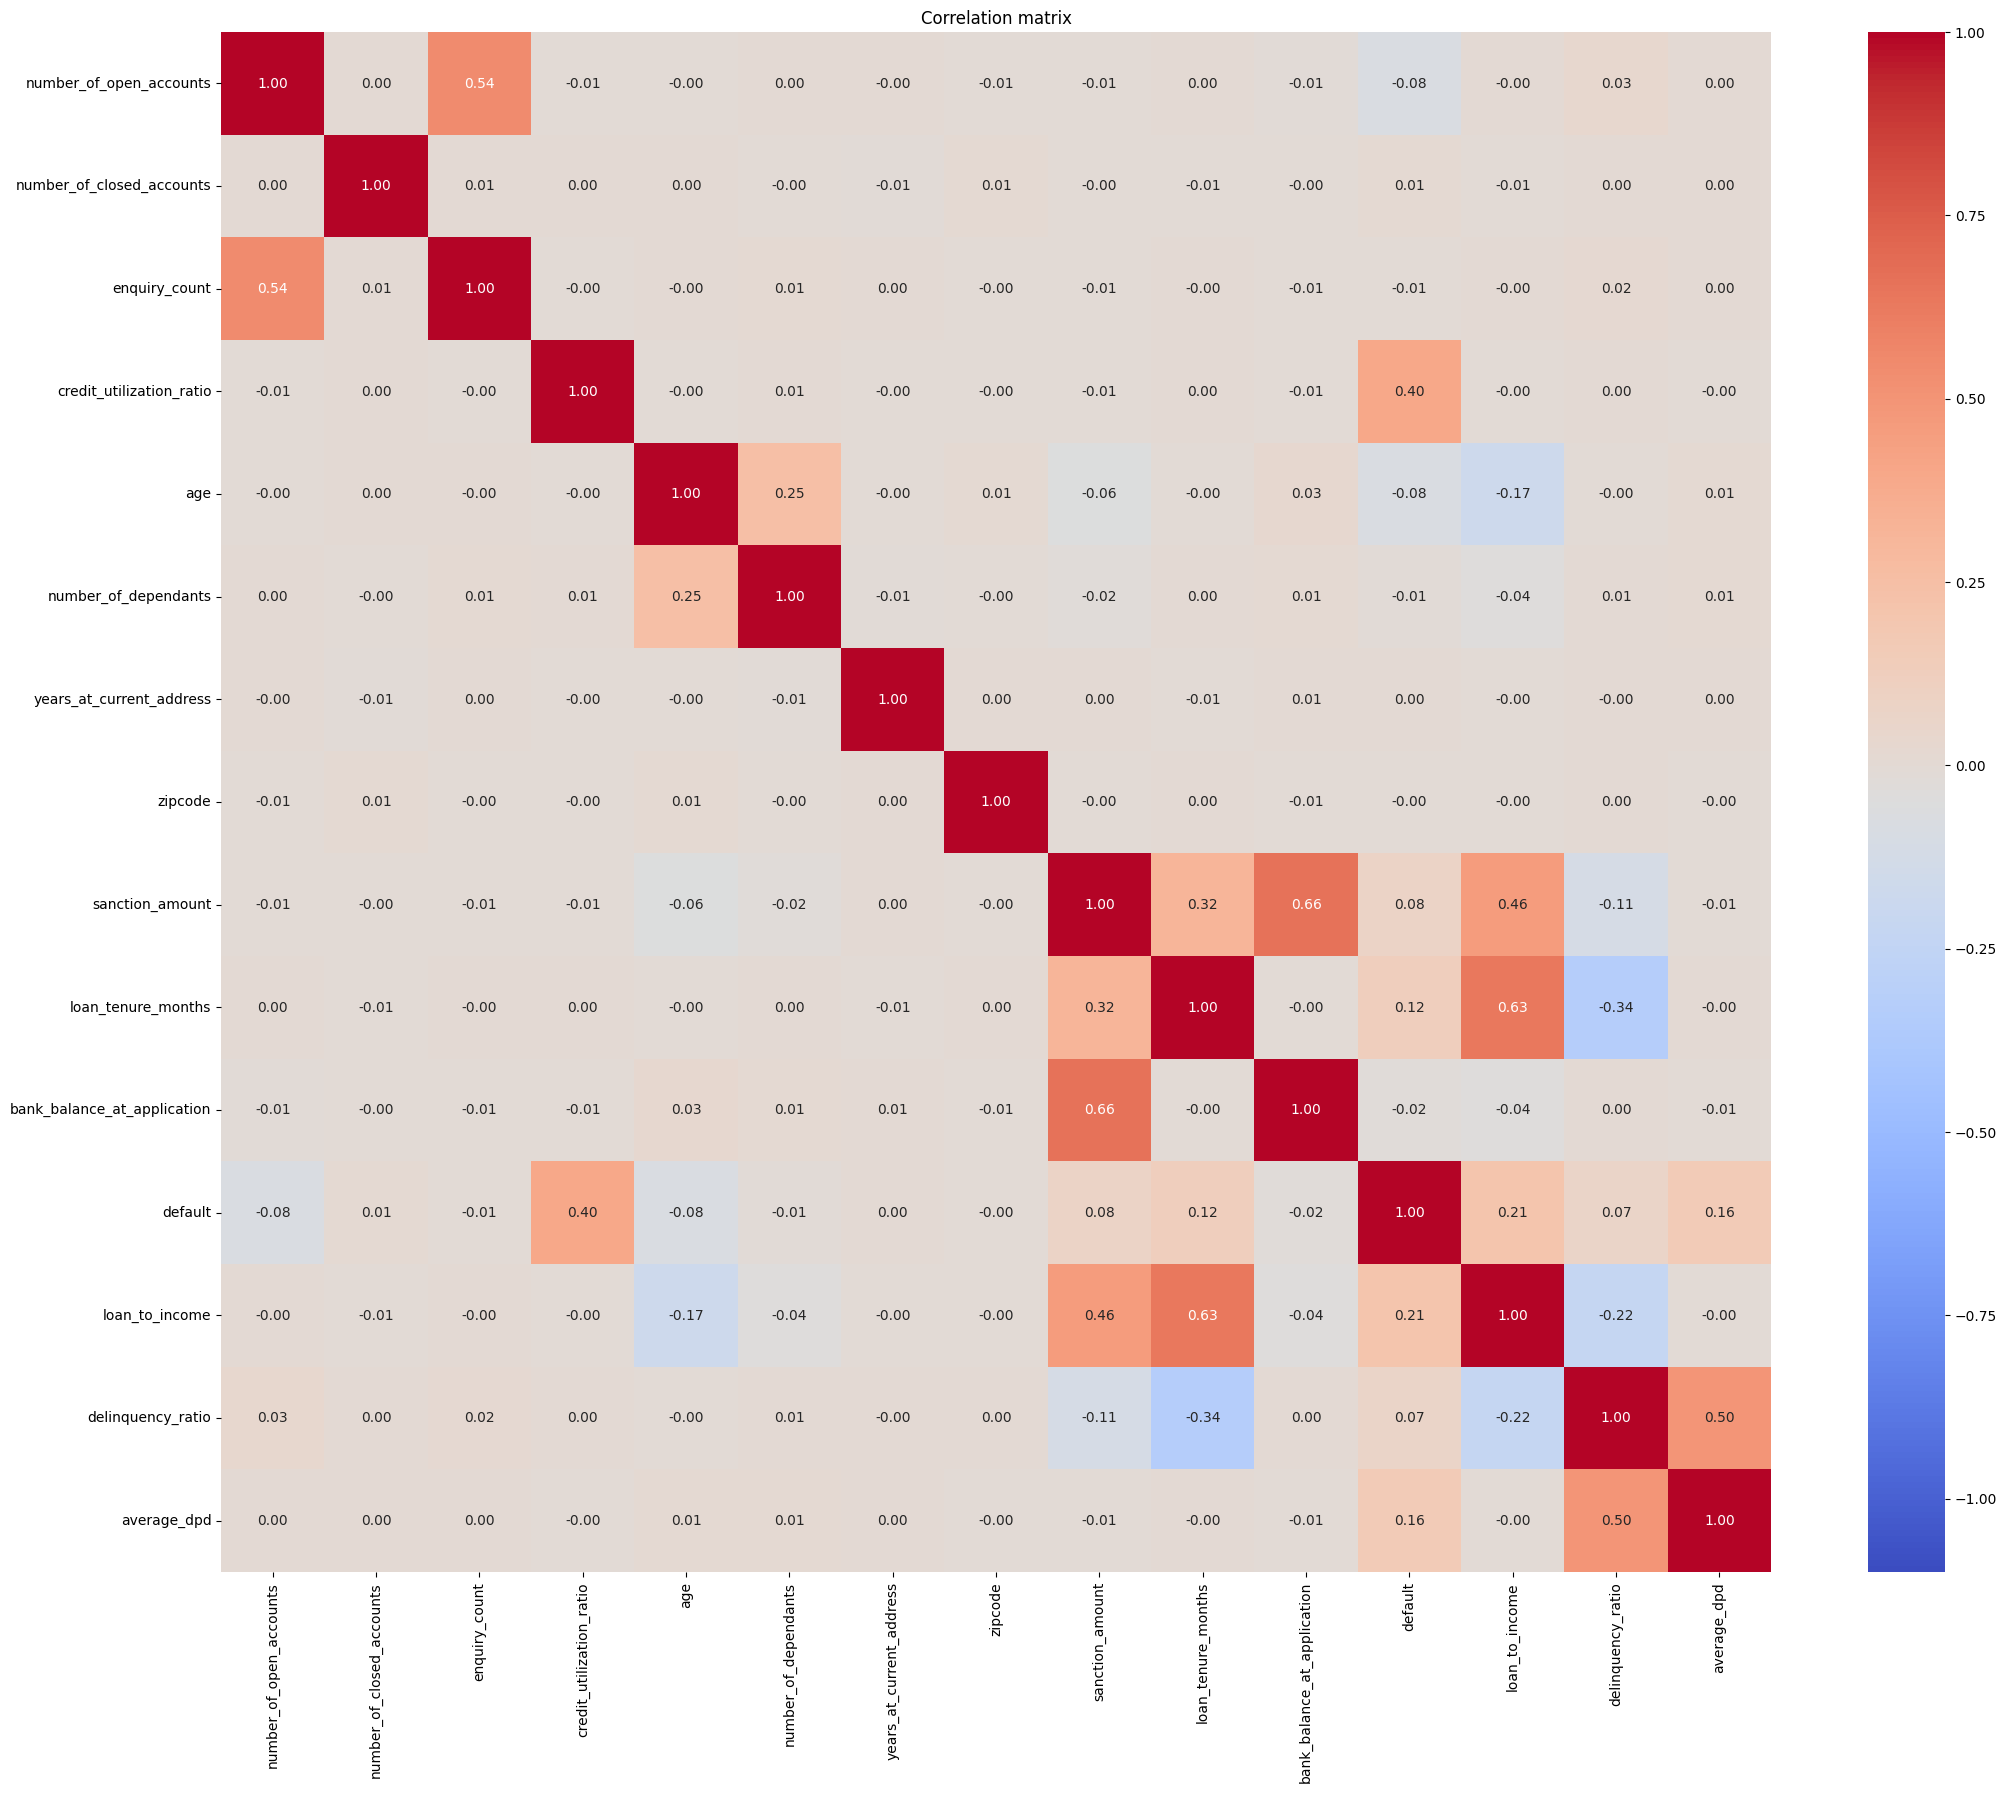

In [59]:
correl_matrix = correl_data.corr()

plt.figure(figsize=(25,20))
sns.heatmap(correl_matrix, cmap='coolwarm',annot=True, vmin=1, vmax=-1, fmt = '0.2f')
plt.title('Correlation matrix')
plt.show()

* Creating copies of datasets after removing features with high multicollinearity
* The above columns are only numerical columns
* There are also catagorical columns
* Train the model on that whole dataset after feature removal is done accordingly to VIF

In [60]:
# Starting with train data

df_train_4 = df_train_3.copy()
df_train_4 = df_train_4.drop(['processing_fee', 'gst', 'net_disbursement', 'principal_outstanding'], axis= 1)

df_test_4 = df_test_3.copy()
df_test_4 = df_test_4.drop(['processing_fee', 'gst', 'net_disbursement', 'principal_outstanding'], axis= 1)


df_train_4.shape, df_test_4.shape

((34992, 23), (14993, 23))

<h1 align = 'center', style = 'color:blue'>Creating training dataset</h1>

In [61]:
X_train = df_train_4.drop('default', axis=1)
y_train = df_train_4['default']

X_test = df_test_4.drop('default', axis=1)
y_test = df_test_4['default']

# Scaling the data

In [62]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

cols_to_scale = X_train.select_dtypes(['int64', 'float64']).columns

scaler = MinMaxScaler()
scaler.fit(X_train[cols_to_scale])
X_train[cols_to_scale] = scaler.transform(X_train[cols_to_scale])

In [63]:
X_train.describe()

,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,loan_tenure_months,bank_balance_at_application,loan_to_income,delinquency_ratio,average_dpd
count,34992.00,34992.00,34992.00,34992.00,34992.00,34992.00,34992.00,34992.00,34992.00,34992.00,34992.00,34992.00,34992.00,34992.00
mean,0.50,0.50,0.50,0.44,0.41,0.39,0.50,0.52,0.09,0.38,0.12,0.29,0.06,0.33
std,0.37,0.41,0.25,0.30,0.19,0.31,0.30,0.29,0.12,0.24,0.13,0.23,0.10,0.29
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.38,0.18,0.29,0.00,0.23,0.33,0.02,0.19,0.03,0.11,0.00,0.00
50%,0.67,0.50,0.50,0.39,0.40,0.40,0.50,0.51,0.05,0.34,0.08,0.20,0.03,0.43
75%,1.00,1.00,0.62,0.68,0.54,0.60,0.77,0.76,0.10,0.55,0.16,0.50,0.09,0.58
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [64]:
# scaling the test data now

X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])
X_test.describe()

,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,loan_tenure_months,bank_balance_at_application,loan_to_income,delinquency_ratio,average_dpd
count,14993.00,14993.00,14993.00,14993.00,14993.00,14993.00,14993.00,14993.00,14993.00,14993.00,14993.00,14993.00,14993.00,14993.00
mean,0.50,0.50,0.50,0.44,0.42,0.39,0.50,0.52,0.09,0.37,0.12,0.29,0.06,0.33
std,0.37,0.41,0.25,0.30,0.19,0.31,0.30,0.29,0.12,0.23,0.13,0.23,0.10,0.29
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00
25%,0.33,0.00,0.38,0.18,0.29,0.00,0.23,0.33,0.02,0.19,0.03,0.11,0.00,0.00
50%,0.67,0.50,0.50,0.39,0.42,0.40,0.50,0.49,0.05,0.34,0.08,0.20,0.03,0.43
75%,0.67,1.00,0.62,0.68,0.54,0.60,0.77,0.76,0.10,0.53,0.16,0.50,0.09,0.57
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.02,1.00,0.95,0.97,1.00,1.00


### Weight of evidence and information values

In [65]:
# Creating copies

X_train_1 = X_train.copy()
X_test_1 = X_test.copy()

* For WoE and IV: https://anikch.medium.com/weight-of-evidence-woe-and-information-value-iv-how-to-use-it-in-eda-and-model-building-3b3b98efe0e8
* The below function uses groupby and gets info about the target value
* Calculates the WoE and IV

In [66]:
def calculate_woe_iv(df, feature, target):
    grouped = df.groupby(feature).agg(default_total_count=('default', 'count'), good_defaulted=("default",'sum'))
    grouped['bad_non_defaulted'] = grouped['default_total_count'] - grouped['good_defaulted']
    
    total_good = grouped['good_defaulted'].sum()
    total_bad = grouped['bad_non_defaulted'].sum()

    grouped['good_pct'] = grouped['good_defaulted']/total_good
    grouped['bad_pct'] = grouped['bad_non_defaulted']/total_bad

    grouped['woe'] = np.log(grouped['good_pct'] / grouped['bad_pct'])
    grouped['iv'] = (grouped['good_pct'] - grouped['bad_pct'])*grouped['woe']
    
    grouped['woe'] = grouped['woe'].replace([np.inf,-np.inf], 0)
    grouped['iv'] = grouped['iv'].replace([np.inf,-np.inf], 0)

    total_iv = grouped['iv'].sum()
    
    return grouped, total_iv

In [67]:
iv_data = {}

for feature in X_train_1.columns:
    if X_train_1[feature].dtype == 'object':
        _, iv = calculate_woe_iv(pd.concat([X_train_1, y_train], axis=1), feature, 'default')
        
    else:
        X_binned = pd.cut(X_train_1[feature], bins=10, labels=False)
        _, iv = calculate_woe_iv(pd.concat([X_binned, y_train], axis=1), feature, 'default')
    
    iv_data[feature] = iv
    
IV_df = pd.DataFrame(data=iv_data.values(), columns=['IV'], index=X_train_1.columns)
IV_df = IV_df.sort_values(ascending=False, by = 'IV')

C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [68]:
pd.options.display.float_format = '{:.3f}'.format

IV_df

,IV
credit_utilization_ratio,2.360
loan_to_income,0.498
loan_purpose,0.397
average_dpd,0.389
residence_type,0.259
loan_tenure_months,0.223
loan_type,0.171
sanction_amount,0.102
number_of_open_accounts,0.088
age,0.085


* We are getting IV for all the columns from here on we will only select features which are important according to IV values
* Such features have IV>0.02

In [69]:
selected_features = IV_df[IV_df['IV']>0.02].index

X_train_reduced = X_train[selected_features]
X_test_reduced = X_test[selected_features]

X_train_reduced.shape, X_test_reduced.shape

((34992, 11), (14993, 11))

## Feature Encoding

In [70]:
X_train_encoded = X_train_reduced.copy()
X_test_encoded = X_test_reduced.copy()

In [76]:
X_train_encoded = pd.get_dummies(X_train_encoded, drop_first=True, dtype= 'float')
X_test_encoded = pd.get_dummies(X_test_encoded, drop_first=True, dtype='float')

X_train_encoded.shape, X_test_encoded.shape, y_train.shape, y_test.shape

((34992, 14), (14993, 14), (34992,), (14993,))

In [73]:
X_train_encoded.head()

,credit_utilization_ratio,loan_to_income,average_dpd,loan_tenure_months,sanction_amount,number_of_open_accounts,age,delinquency_ratio,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,residence_type_Owned,residence_type_Rented,loan_type_Unsecured
29671,0.545,0.644,0.595,0.415,0.150,0.333,0.404,0.188,0.000,1.000,0.000,0.000,1.000,0.000
48133,0.000,0.093,0.000,0.226,0.022,1.000,0.365,0.000,0.000,0.000,1.000,1.000,0.000,1.000
2872,0.434,0.811,0.400,0.415,0.074,1.000,0.019,0.009,0.000,1.000,0.000,1.000,0.000,0.000
23899,0.596,0.181,0.567,0.396,0.025,0.667,0.058,0.111,0.000,0.000,0.000,1.000,0.000,0.000
40469,0.152,0.522,0.680,0.528,0.108,1.000,0.692,0.074,0.000,1.000,0.000,1.000,0.000,0.000


<h1 align = 'center', style = 'color: blue'>Model Training</h1>

### Attempt 1
* Logistic regression, RandomForest and XGBoost
* No class imbalance handling on this attempt

## Logistic Regression

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix


In [77]:
model = LogisticRegression()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)

In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     13725
           1       0.77      0.56      0.65      1268

    accuracy                           0.95     14993
   macro avg       0.86      0.77      0.81     14993
weighted avg       0.94      0.95      0.94     14993



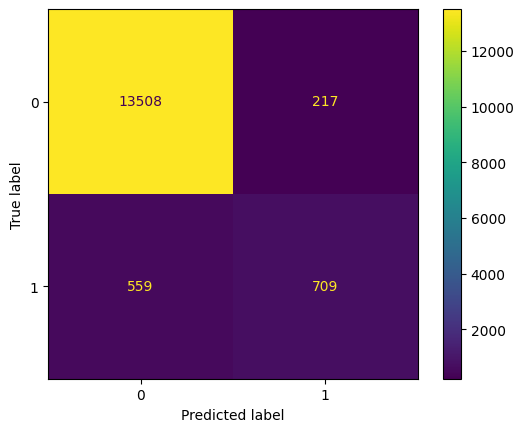

In [85]:
ConfusionMatrixDisplay.from_estimator(model, X_test_encoded, y_test)
plt.show()

# Random Forest Classifier

In [81]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     13725
           1       0.77      0.56      0.65      1268

    accuracy                           0.95     14993
   macro avg       0.86      0.77      0.81     14993
weighted avg       0.94      0.95      0.94     14993



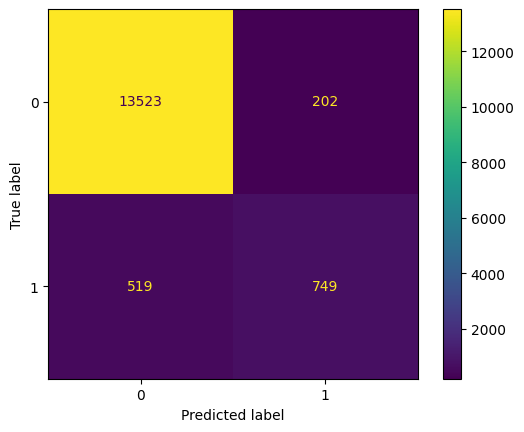

In [84]:
ConfusionMatrixDisplay.from_estimator(model_rf, X_test_encoded, y_test)
plt.show()

# XGBoost

In [86]:
from xgboost import XGBClassifier

In [88]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train_encoded, y_train)

y_pred = model_xgb.predict(X_test_encoded)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     13725
           1       0.75      0.64      0.69      1268

    accuracy                           0.95     14993
   macro avg       0.86      0.81      0.83     14993
weighted avg       0.95      0.95      0.95     14993



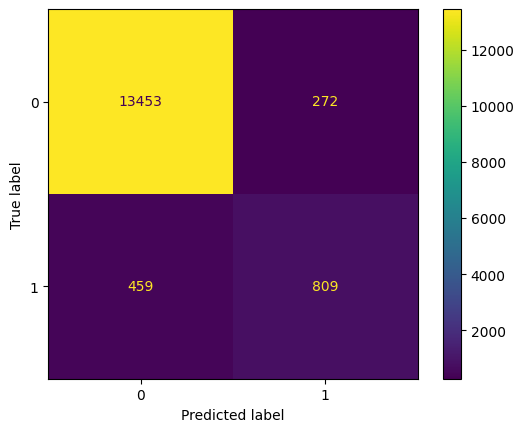

In [89]:
ConfusionMatrixDisplay.from_estimator(model_xgb, X_test_encoded, y_test)
plt.show()

* From the above observations we can see that the performance for true condition is not turning out good even with different classifiers
* In this scenario we will choose Logistic Regression since there is not much improvement in other classifiers and Logistic Regression has a better explainability

### Random Search CV with Logistic Regression

In [91]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    'C': np.logspace(-4,4,20),
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'penalty': ['l1', 'l2', 'elasticnet', None]
}

model_lr = LogisticRegression(max_iter=1000)

random_search = RandomizedSearchCV(
    estimator= model_lr,
    param_distributions= params,
    n_iter= 50,
    scoring= 'f1',
    cv = 5,
    verbose= 2,
    random_state= 101
)

random_search.fit(X_train_encoded, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END C=0.615848211066026, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.615848211066026, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.615848211066026, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.615848211066026, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.615848211066026, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.012742749857031334, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.012742749857031334, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.012742749857031334, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.012742749857031334, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.012742749857031334, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .......C=1438.44988828766, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=1438.449888287

C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:497: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=2.50417e-19): result may not be accurate.
  warnings.warn(
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio p

[CV] END C=0.004832930238571752, penalty=None, solver=newton-cholesky; total time=   0.0s
[CV] END C=0.004832930238571752, penalty=None, solver=newton-cholesky; total time=   0.0s
[CV] END ......C=545.5594781168514, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=545.5594781168514, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=545.5594781168514, penalty=l2, solver=lbfgs; total time=   0.0s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:497: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=6.85339e-19): result may not be accurate.
  warnings.warn(


[CV] END ......C=545.5594781168514, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=545.5594781168514, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=3792.690190732246, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END C=3792.690190732246, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END C=3792.690190732246, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END C=3792.690190732246, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END C=3792.690190732246, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END ...............C=0.0001, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END ...............C=0.0001, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END ...............C=0.0001, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END ...............C=0.0001, penalty=None, solver=lbfgs; total time=   0.0s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1

[CV] END ...............C=0.0001, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END .C=11.288378916846883, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=11.288378916846883, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=11.288378916846883, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=11.288378916846883, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=11.288378916846883, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....C=1438.44988828766, penalty=None, solver=lbfgs; total time=   0.0s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1

[CV] END .....C=1438.44988828766, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END .....C=1438.44988828766, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END .....C=1438.44988828766, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END .....C=1438.44988828766, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END ........C=1438.44988828766, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=1438.44988828766, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=1438.44988828766, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=1438.44988828766, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=1438.44988828766, penalty=l2, solver=saga; total time=   0.0s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=29.763514416313132, penalty=None, solver=sag; total time=   0.0s
[CV] END .....C=29.763514416313132, penalty=None, solver=sag; total time=   0.1s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=29.763514416313132, penalty=None, solver=sag; total time=   0.0s
[CV] END .....C=29.763514416313132, penalty=None, solver=sag; total time=   0.0s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=29.763514416313132, penalty=None, solver=sag; total time=   0.1s
[CV] END C=29.763514416313132, penalty=l1, solver=newton-cholesky; total time=   0.0s
[CV] END C=29.763514416313132, penalty=l1, solver=newton-cholesky; total time=   0.0s
[CV] END C=29.763514416313132, penalty=l1, solver=newton-cholesky; total time=   0.0s
[CV] END C=29.763514416313132, penalty=l1, solver=newton-cholesky; total time=   0.0s
[CV] END C=29.763514416313132, penalty=l1, solver=newton-cholesky; total time=   0.0s
[CV] END C=1438.44988828766, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=1438.44988828766, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=1438.44988828766, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=1438.44988828766, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=1438.44988828766, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .........C=0.0001, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV

C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=206.913808111479, penalty=None, solver=saga; total time=   0.0s
[CV] END ......C=206.913808111479, penalty=None, solver=saga; total time=   0.0s
[CV] END C=4.281332398719396, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=4.281332398719396, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=4.281332398719396, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=4.281332398719396, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=4.281332398719396, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ..C=3792.690190732246, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=3792.690190732246, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ..C=3792.690190732246, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=3792.690190732246, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=3792.690190732246, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.0001, penalty=None, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.0001, penalty=None, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.0001, penalty=None, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.0001, penalty=None, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.0001, penalty=None, solver=liblinear; total time=   0.0s
[CV] END C=0.23357214690901212, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.23357214690901212, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.23357214690901212, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.23357214690901212, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.233572146909012

C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ...C=0.23357214690901212, penalty=None, solver=saga; total time=   0.0s
[CV] END ...C=0.23357214690901212, penalty=None, solver=saga; total time=   0.0s
[CV] END ...C=0.23357214690901212, penalty=None, solver=saga; total time=   0.0s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .C=11.288378916846883, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END .C=11.288378916846883, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END .C=11.288378916846883, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END .C=11.288378916846883, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END .C=11.288378916846883, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END ....C=0.615848211066026, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.615848211066026, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.615848211066026, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.615848211066026, penalty=None, solver=lbfgs; total time=   0.0s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1

[CV] END ....C=0.615848211066026, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END C=0.08858667904100823, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.08858667904100823, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.08858667904100823, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.08858667904100823, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.08858667904100823, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.23357214690901212, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.23357214690901212, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.23357214690901212, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.23357214690901212, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.23357214690901212, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=11.288378916846883, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=11.2883789

C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .C=0.004832930238571752, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END .C=0.004832930238571752, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END .....C=0.08858667904100823, penalty=l2, solver=saga; total time=   0.0s
[CV] END .....C=0.08858667904100823, penalty=l2, solver=saga; total time=   0.0s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=0.08858667904100823, penalty=l2, solver=saga; total time=   0.0s
[CV] END .....C=0.08858667904100823, penalty=l2, solver=saga; total time=   0.0s
[CV] END .....C=0.08858667904100823, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=3792.690190732246, penalty=None, solver=newton-cholesky; total time=   0.0s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:497: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=2.50417e-19): result may not be accurate.
  warnings.warn(
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio p

[CV] END C=3792.690190732246, penalty=None, solver=newton-cholesky; total time=   0.0s
[CV] END C=3792.690190732246, penalty=None, solver=newton-cholesky; total time=   0.0s
[CV] END C=3792.690190732246, penalty=None, solver=newton-cholesky; total time=   0.0s
[CV] END C=3792.690190732246, penalty=None, solver=newton-cholesky; total time=   0.0s
[CV] END C=0.03359818286283781, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.03359818286283781, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.03359818286283781, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.03359818286283781, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.03359818286283781, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .............C=0.0001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .............C=0.0001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .............C=0.0001, penalty=l1, solver=newton-cg; total ti

C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=78.47599703514607, penalty=None, solver=saga; total time=   0.0s
[CV] END .....C=78.47599703514607, penalty=None, solver=saga; total time=   0.0s
[CV] END .....C=78.47599703514607, penalty=None, solver=saga; total time=   0.0s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=78.47599703514607, penalty=None, solver=saga; total time=   0.0s
[CV] END .....C=78.47599703514607, penalty=None, solver=saga; total time=   0.0s
[CV] END C=0.004832930238571752, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.004832930238571752, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.004832930238571752, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.004832930238571752, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.004832930238571752, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=3792.690190732246, penalty=l1, solver=newton-cholesky; total time=   0.0s
[CV] END C=3792.690190732246, penalty=l1, solver=newton-cholesky; total time=   0.0s
[CV] END C=3792.690190732246, penalty=l1, solver=newton-cholesky; total time=   0.0s
[CV] END C=3792.690190732246, penalty=l1, solver=newton-cholesky; total time=   0.0s
[CV] END C=3792.690190732246, penalty=l1, solver=newton-cholesky; total time=   0.0s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
105 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Parker\

RandomizedSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_iter=50,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga']},
                   random_state=101, scoring='f1', verbose=2)

In [92]:
print(f"The best parameters = {random_search.best_params_}")
print(f"The best score = {random_search.best_score_}")

model = random_search.best_estimator_

y_pred = model.predict(X_test_encoded)
print(classification_report(y_test, y_pred))

The best parameters = {'solver': 'liblinear', 'penalty': 'l2', 'C': 3792.690190732246}
The best score = 0.6694062633301517
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     13725
           1       0.76      0.57      0.65      1268

    accuracy                           0.95     14993
   macro avg       0.86      0.78      0.81     14993
weighted avg       0.94      0.95      0.94     14993



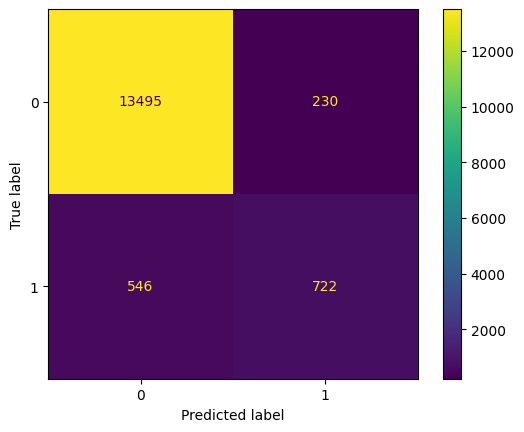

In [94]:
ConfusionMatrixDisplay.from_estimator(model, X_test_encoded, y_test)
plt.show()

### Random Search CV with XGBoost

In [95]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    # Maximum depth of the tree. Typical range: [3, 10]
    "max_depth": [3, 4, 5, 6, 7, 8, 9, 10],
    
    # Learning rate or shrinkage. Typical range: [0.01, 0.3]
    "learning_rate": [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    
    # Number of trees (boosting rounds). Typical range: [50, 500]
    "n_estimators": [50, 100, 150, 200, 300, 400, 500],
    
    # Minimum loss reduction required to make a split. Typical range: [0, 5]
    "gamma": [0, 0.1, 0.2, 0.5, 1, 2, 5],
    
    # Subsample ratio of the training instances. Typical range: [0.5, 1.0]
    "subsample": [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    
    # Fraction of features used for each tree. Typical range: [0.5, 1.0]
    "colsample_bytree": [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    
    # Minimum sum of instance weights for a child node. Typical range: [1, 10]
    "min_child_weight": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    
    # L2 regularization term on weights. Typical range: [0, 10]
    "lambda": [0, 0.1, 1, 2, 5, 10],
    
    # L1 regularization term on weights. Typical range: [0, 10]
    "alpha": [0, 0.1, 1, 2, 5, 10],
    
    # Tree method (if using GPU). Options: ['auto', 'exact', 'approx', 'hist', 'gpu_hist']
    "tree_method": ["auto", "exact", "approx", "hist", "gpu_hist"]
}


model_xgb = XGBClassifier()

random_search = RandomizedSearchCV(
    estimator= model_xgb,
    param_distributions= params,
    n_iter= 50,
    scoring= 'f1',
    cv = 5,
    verbose= 2,
    random_state= 101
)

random_search.fit(X_train_encoded, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END alpha=1, colsample_bytree=0.7, gamma=0.1, lambda=5, learning_rate=0.3, max_depth=5, min_child_weight=9, n_estimators=200, subsample=0.7, tree_method=hist; total time=   0.1s
[CV] END alpha=1, colsample_bytree=0.7, gamma=0.1, lambda=5, learning_rate=0.3, max_depth=5, min_child_weight=9, n_estimators=200, subsample=0.7, tree_method=hist; total time=   0.1s
[CV] END alpha=1, colsample_bytree=0.7, gamma=0.1, lambda=5, learning_rate=0.3, max_depth=5, min_child_weight=9, n_estimators=200, subsample=0.7, tree_method=hist; total time=   0.1s
[CV] END alpha=1, colsample_bytree=0.7, gamma=0.1, lambda=5, learning_rate=0.3, max_depth=5, min_child_weight=9, n_estimators=200, subsample=0.7, tree_method=hist; total time=   0.1s
[CV] END alpha=1, colsample_bytree=0.7, gamma=0.1, lambda=5, learning_rate=0.3, max_depth=5, min_child_weight=9, n_estimators=200, subsample=0.7, tree_method=hist; total time=   0.1s
[CV] END alpha=0.1, col

C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:32:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:32:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python

[CV] END alpha=2, colsample_bytree=0.5, gamma=1, lambda=0.1, learning_rate=0.15, max_depth=4, min_child_weight=4, n_estimators=200, subsample=0.6, tree_method=gpu_hist; total time=   0.6s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:32:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:32:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=2, colsample_bytree=0.5, gamma=1, lambda=0.1, learning_rate=0.15, max_depth=4, min_child_weight=4, n_estimators=200, subsample=0.6, tree_method=gpu_hist; total time=   0.3s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:32:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:32:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=2, colsample_bytree=0.5, gamma=1, lambda=0.1, learning_rate=0.15, max_depth=4, min_child_weight=4, n_estimators=200, subsample=0.6, tree_method=gpu_hist; total time=   0.3s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:32:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:32:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=2, colsample_bytree=0.5, gamma=1, lambda=0.1, learning_rate=0.15, max_depth=4, min_child_weight=4, n_estimators=200, subsample=0.6, tree_method=gpu_hist; total time=   0.3s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:32:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:32:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=2, colsample_bytree=0.5, gamma=1, lambda=0.1, learning_rate=0.15, max_depth=4, min_child_weight=4, n_estimators=200, subsample=0.6, tree_method=gpu_hist; total time=   0.3s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:32:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:32:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=10, colsample_bytree=0.9, gamma=0.1, lambda=1, learning_rate=0.25, max_depth=10, min_child_weight=8, n_estimators=200, subsample=0.5, tree_method=gpu_hist; total time=   0.6s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=10, colsample_bytree=0.9, gamma=0.1, lambda=1, learning_rate=0.25, max_depth=10, min_child_weight=8, n_estimators=200, subsample=0.5, tree_method=gpu_hist; total time=   0.6s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=10, colsample_bytree=0.9, gamma=0.1, lambda=1, learning_rate=0.25, max_depth=10, min_child_weight=8, n_estimators=200, subsample=0.5, tree_method=gpu_hist; total time=   0.5s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=10, colsample_bytree=0.9, gamma=0.1, lambda=1, learning_rate=0.25, max_depth=10, min_child_weight=8, n_estimators=200, subsample=0.5, tree_method=gpu_hist; total time=   0.5s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=10, colsample_bytree=0.9, gamma=0.1, lambda=1, learning_rate=0.25, max_depth=10, min_child_weight=8, n_estimators=200, subsample=0.5, tree_method=gpu_hist; total time=   0.5s
[CV] END alpha=1, colsample_bytree=0.5, gamma=2, lambda=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.9, tree_method=exact; total time=   1.0s
[CV] END alpha=1, colsample_bytree=0.5, gamma=2, lambda=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.9, tree_method=exact; total time=   1.0s
[CV] END alpha=1, colsample_bytree=0.5, gamma=2, lambda=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.9, tree_method=exact; total time=   1.0s
[CV] END alpha=1, colsample_bytree=0.5, gamma=2, lambda=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.9, tree_method=exact; total time=   0.9s
[CV] END alpha=1, colsample_bytree=0.5, gamma=2, lambda=0.1, learning_rate

C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python

[CV] END alpha=1, colsample_bytree=0.7, gamma=2, lambda=10, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, subsample=0.7, tree_method=gpu_hist; total time=   0.6s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=1, colsample_bytree=0.7, gamma=2, lambda=10, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, subsample=0.7, tree_method=gpu_hist; total time=   0.4s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=1, colsample_bytree=0.7, gamma=2, lambda=10, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, subsample=0.7, tree_method=gpu_hist; total time=   0.3s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=1, colsample_bytree=0.7, gamma=2, lambda=10, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, subsample=0.7, tree_method=gpu_hist; total time=   0.3s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=1, colsample_bytree=0.7, gamma=2, lambda=10, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, subsample=0.7, tree_method=gpu_hist; total time=   0.4s
[CV] END alpha=0.1, colsample_bytree=1.0, gamma=0.5, lambda=0.1, learning_rate=0.1, max_depth=10, min_child_weight=10, n_estimators=100, subsample=0.5, tree_method=auto; total time=   0.1s
[CV] END alpha=0.1, colsample_bytree=1.0, gamma=0.5, lambda=0.1, learning_rate=0.1, max_depth=10, min_child_weight=10, n_estimators=100, subsample=0.5, tree_method=auto; total time=   0.1s
[CV] END alpha=0.1, colsample_bytree=1.0, gamma=0.5, lambda=0.1, learning_rate=0.1, max_depth=10, min_child_weight=10, n_estimators=100, subsample=0.5, tree_method=auto; total time=   0.1s
[CV] END alpha=0.1, colsample_bytree=1.0, gamma=0.5, lambda=0.1, learning_rate=0.1, max_depth=10, min_child_weight=10, n_estimators=100, subsample=0.5, tree_method=auto; total time=   0.1s
[CV] END alpha=0.1, colsample_bytree=1.0, gamma=0.5, lamb

C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python

[CV] END alpha=10, colsample_bytree=0.9, gamma=0.5, lambda=0.1, learning_rate=0.15, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.8, tree_method=gpu_hist; total time=   0.4s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=10, colsample_bytree=0.9, gamma=0.5, lambda=0.1, learning_rate=0.15, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.8, tree_method=gpu_hist; total time=   0.4s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=10, colsample_bytree=0.9, gamma=0.5, lambda=0.1, learning_rate=0.15, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.8, tree_method=gpu_hist; total time=   0.4s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=10, colsample_bytree=0.9, gamma=0.5, lambda=0.1, learning_rate=0.15, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.8, tree_method=gpu_hist; total time=   0.4s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=10, colsample_bytree=0.9, gamma=0.5, lambda=0.1, learning_rate=0.15, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.8, tree_method=gpu_hist; total time=   0.4s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=0.1, colsample_bytree=1.0, gamma=0.5, lambda=0, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=50, subsample=0.9, tree_method=gpu_hist; total time=   0.2s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=0.1, colsample_bytree=1.0, gamma=0.5, lambda=0, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=50, subsample=0.9, tree_method=gpu_hist; total time=   0.1s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=0.1, colsample_bytree=1.0, gamma=0.5, lambda=0, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=50, subsample=0.9, tree_method=gpu_hist; total time=   0.1s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=0.1, colsample_bytree=1.0, gamma=0.5, lambda=0, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=50, subsample=0.9, tree_method=gpu_hist; total time=   0.2s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=0.1, colsample_bytree=1.0, gamma=0.5, lambda=0, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=50, subsample=0.9, tree_method=gpu_hist; total time=   0.1s
[CV] END alpha=2, colsample_bytree=0.9, gamma=0.1, lambda=0.1, learning_rate=0.05, max_depth=5, min_child_weight=9, n_estimators=400, subsample=0.6, tree_method=auto; total time=   0.4s
[CV] END alpha=2, colsample_bytree=0.9, gamma=0.1, lambda=0.1, learning_rate=0.05, max_depth=5, min_child_weight=9, n_estimators=400, subsample=0.6, tree_method=auto; total time=   0.4s
[CV] END alpha=2, colsample_bytree=0.9, gamma=0.1, lambda=0.1, learning_rate=0.05, max_depth=5, min_child_weight=9, n_estimators=400, subsample=0.6, tree_method=auto; total time=   0.4s
[CV] END alpha=2, colsample_bytree=0.9, gamma=0.1, lambda=0.1, learning_rate=0.05, max_depth=5, min_child_weight=9, n_estimators=400, subsample=0.6, tree_method=auto; total time=   0.4s
[CV] END alpha=2, colsample_bytree=0.9, gamma=0.1, lambda=0.1, learn

C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python

[CV] END alpha=10, colsample_bytree=0.5, gamma=5, lambda=5, learning_rate=0.05, max_depth=8, min_child_weight=6, n_estimators=100, subsample=0.8, tree_method=gpu_hist; total time=   0.4s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=10, colsample_bytree=0.5, gamma=5, lambda=5, learning_rate=0.05, max_depth=8, min_child_weight=6, n_estimators=100, subsample=0.8, tree_method=gpu_hist; total time=   0.3s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=10, colsample_bytree=0.5, gamma=5, lambda=5, learning_rate=0.05, max_depth=8, min_child_weight=6, n_estimators=100, subsample=0.8, tree_method=gpu_hist; total time=   0.2s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=10, colsample_bytree=0.5, gamma=5, lambda=5, learning_rate=0.05, max_depth=8, min_child_weight=6, n_estimators=100, subsample=0.8, tree_method=gpu_hist; total time=   0.2s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=10, colsample_bytree=0.5, gamma=5, lambda=5, learning_rate=0.05, max_depth=8, min_child_weight=6, n_estimators=100, subsample=0.8, tree_method=gpu_hist; total time=   0.2s
[CV] END alpha=5, colsample_bytree=0.5, gamma=0, lambda=5, learning_rate=0.25, max_depth=7, min_child_weight=7, n_estimators=400, subsample=0.6, tree_method=hist; total time=   0.4s
[CV] END alpha=5, colsample_bytree=0.5, gamma=0, lambda=5, learning_rate=0.25, max_depth=7, min_child_weight=7, n_estimators=400, subsample=0.6, tree_method=hist; total time=   0.6s
[CV] END alpha=5, colsample_bytree=0.5, gamma=0, lambda=5, learning_rate=0.25, max_depth=7, min_child_weight=7, n_estimators=400, subsample=0.6, tree_method=hist; total time=   0.6s
[CV] END alpha=5, colsample_bytree=0.5, gamma=0, lambda=5, learning_rate=0.25, max_depth=7, min_child_weight=7, n_estimators=400, subsample=0.6, tree_method=hist; total time=   0.6s
[CV] END alpha=5, colsample_bytree=0.5, gamma=0, lambda=5, learning_rate=0.25, max_de

C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python

[CV] END alpha=1, colsample_bytree=0.9, gamma=0.2, lambda=0.1, learning_rate=0.01, max_depth=6, min_child_weight=4, n_estimators=300, subsample=0.6, tree_method=gpu_hist; total time=   1.0s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=1, colsample_bytree=0.9, gamma=0.2, lambda=0.1, learning_rate=0.01, max_depth=6, min_child_weight=4, n_estimators=300, subsample=0.6, tree_method=gpu_hist; total time=   0.8s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=1, colsample_bytree=0.9, gamma=0.2, lambda=0.1, learning_rate=0.01, max_depth=6, min_child_weight=4, n_estimators=300, subsample=0.6, tree_method=gpu_hist; total time=   0.8s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=1, colsample_bytree=0.9, gamma=0.2, lambda=0.1, learning_rate=0.01, max_depth=6, min_child_weight=4, n_estimators=300, subsample=0.6, tree_method=gpu_hist; total time=   0.8s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=1, colsample_bytree=0.9, gamma=0.2, lambda=0.1, learning_rate=0.01, max_depth=6, min_child_weight=4, n_estimators=300, subsample=0.6, tree_method=gpu_hist; total time=   0.8s
[CV] END alpha=2, colsample_bytree=0.5, gamma=0.2, lambda=0.1, learning_rate=0.05, max_depth=6, min_child_weight=4, n_estimators=100, subsample=0.7, tree_method=exact; total time=   0.6s
[CV] END alpha=2, colsample_bytree=0.5, gamma=0.2, lambda=0.1, learning_rate=0.05, max_depth=6, min_child_weight=4, n_estimators=100, subsample=0.7, tree_method=exact; total time=   0.6s
[CV] END alpha=2, colsample_bytree=0.5, gamma=0.2, lambda=0.1, learning_rate=0.05, max_depth=6, min_child_weight=4, n_estimators=100, subsample=0.7, tree_method=exact; total time=   0.6s
[CV] END alpha=2, colsample_bytree=0.5, gamma=0.2, lambda=0.1, learning_rate=0.05, max_depth=6, min_child_weight=4, n_estimators=100, subsample=0.7, tree_method=exact; total time=   0.6s
[CV] END alpha=2, colsample_bytree=0.5, gamma=0.2, lambda=0.1,

C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python

[CV] END alpha=2, colsample_bytree=0.8, gamma=0.5, lambda=1, learning_rate=0.2, max_depth=10, min_child_weight=2, n_estimators=400, subsample=0.7, tree_method=gpu_hist; total time=   1.3s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=2, colsample_bytree=0.8, gamma=0.5, lambda=1, learning_rate=0.2, max_depth=10, min_child_weight=2, n_estimators=400, subsample=0.7, tree_method=gpu_hist; total time=   1.1s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:34:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:34:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=2, colsample_bytree=0.8, gamma=0.5, lambda=1, learning_rate=0.2, max_depth=10, min_child_weight=2, n_estimators=400, subsample=0.7, tree_method=gpu_hist; total time=   1.1s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:34:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:34:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=2, colsample_bytree=0.8, gamma=0.5, lambda=1, learning_rate=0.2, max_depth=10, min_child_weight=2, n_estimators=400, subsample=0.7, tree_method=gpu_hist; total time=   1.1s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:34:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=2, colsample_bytree=0.8, gamma=0.5, lambda=1, learning_rate=0.2, max_depth=10, min_child_weight=2, n_estimators=400, subsample=0.7, tree_method=gpu_hist; total time=   1.1s
[CV] END alpha=10, colsample_bytree=1.0, gamma=1, lambda=10, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=200, subsample=0.7, tree_method=approx; total time=   1.0s
[CV] END alpha=10, colsample_bytree=1.0, gamma=1, lambda=10, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=200, subsample=0.7, tree_method=approx; total time=   1.0s
[CV] END alpha=10, colsample_bytree=1.0, gamma=1, lambda=10, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=200, subsample=0.7, tree_method=approx; total time=   1.0s
[CV] END alpha=10, colsample_bytree=1.0, gamma=1, lambda=10, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=200, subsample=0.7, tree_method=approx; total time=   0.9s
[CV] END alpha=10, colsample_bytree=1.0, gamma=1, lambda=10, learnin

C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:34:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:34:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python

[CV] END alpha=2, colsample_bytree=0.5, gamma=0.5, lambda=0.1, learning_rate=0.2, max_depth=10, min_child_weight=7, n_estimators=300, subsample=0.9, tree_method=gpu_hist; total time=   0.9s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:34:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:34:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=2, colsample_bytree=0.5, gamma=0.5, lambda=0.1, learning_rate=0.2, max_depth=10, min_child_weight=7, n_estimators=300, subsample=0.9, tree_method=gpu_hist; total time=   0.7s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:34:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:34:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=2, colsample_bytree=0.5, gamma=0.5, lambda=0.1, learning_rate=0.2, max_depth=10, min_child_weight=7, n_estimators=300, subsample=0.9, tree_method=gpu_hist; total time=   0.7s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:34:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:34:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=2, colsample_bytree=0.5, gamma=0.5, lambda=0.1, learning_rate=0.2, max_depth=10, min_child_weight=7, n_estimators=300, subsample=0.9, tree_method=gpu_hist; total time=   0.7s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:34:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=2, colsample_bytree=0.5, gamma=0.5, lambda=0.1, learning_rate=0.2, max_depth=10, min_child_weight=7, n_estimators=300, subsample=0.9, tree_method=gpu_hist; total time=   0.7s
[CV] END alpha=10, colsample_bytree=0.9, gamma=5, lambda=0.1, learning_rate=0.2, max_depth=8, min_child_weight=9, n_estimators=100, subsample=0.8, tree_method=hist; total time=   0.0s
[CV] END alpha=10, colsample_bytree=0.9, gamma=5, lambda=0.1, learning_rate=0.2, max_depth=8, min_child_weight=9, n_estimators=100, subsample=0.8, tree_method=hist; total time=   0.0s
[CV] END alpha=10, colsample_bytree=0.9, gamma=5, lambda=0.1, learning_rate=0.2, max_depth=8, min_child_weight=9, n_estimators=100, subsample=0.8, tree_method=hist; total time=   0.0s
[CV] END alpha=10, colsample_bytree=0.9, gamma=5, lambda=0.1, learning_rate=0.2, max_depth=8, min_child_weight=9, n_estimators=100, subsample=0.8, tree_method=hist; total time=   0.0s
[CV] END alpha=10, colsample_bytree=0.9, gamma=5, lambda=0.1, learning_rat

C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:34:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:34:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python

[CV] END alpha=0.1, colsample_bytree=0.6, gamma=0.2, lambda=5, learning_rate=0.3, max_depth=10, min_child_weight=5, n_estimators=300, subsample=1.0, tree_method=gpu_hist; total time=   0.9s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:34:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:34:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=0.1, colsample_bytree=0.6, gamma=0.2, lambda=5, learning_rate=0.3, max_depth=10, min_child_weight=5, n_estimators=300, subsample=1.0, tree_method=gpu_hist; total time=   0.7s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:34:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:34:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=0.1, colsample_bytree=0.6, gamma=0.2, lambda=5, learning_rate=0.3, max_depth=10, min_child_weight=5, n_estimators=300, subsample=1.0, tree_method=gpu_hist; total time=   0.7s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:34:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:34:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=0.1, colsample_bytree=0.6, gamma=0.2, lambda=5, learning_rate=0.3, max_depth=10, min_child_weight=5, n_estimators=300, subsample=1.0, tree_method=gpu_hist; total time=   0.6s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:34:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=0.1, colsample_bytree=0.6, gamma=0.2, lambda=5, learning_rate=0.3, max_depth=10, min_child_weight=5, n_estimators=300, subsample=1.0, tree_method=gpu_hist; total time=   0.7s
[CV] END alpha=5, colsample_bytree=0.5, gamma=0.2, lambda=1, learning_rate=0.15, max_depth=8, min_child_weight=9, n_estimators=50, subsample=0.5, tree_method=auto; total time=   0.0s
[CV] END alpha=5, colsample_bytree=0.5, gamma=0.2, lambda=1, learning_rate=0.15, max_depth=8, min_child_weight=9, n_estimators=50, subsample=0.5, tree_method=auto; total time=   0.0s
[CV] END alpha=5, colsample_bytree=0.5, gamma=0.2, lambda=1, learning_rate=0.15, max_depth=8, min_child_weight=9, n_estimators=50, subsample=0.5, tree_method=auto; total time=   0.0s
[CV] END alpha=5, colsample_bytree=0.5, gamma=0.2, lambda=1, learning_rate=0.15, max_depth=8, min_child_weight=9, n_estimators=50, subsample=0.5, tree_method=auto; total time=   0.0s
[CV] END alpha=5, colsample_bytree=0.5, gamma=0.2, lambda=1, learning_rate=0.1

C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:34:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:34:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python

[CV] END alpha=10, colsample_bytree=0.7, gamma=0.2, lambda=0, learning_rate=0.25, max_depth=4, min_child_weight=6, n_estimators=400, subsample=0.7, tree_method=gpu_hist; total time=   0.7s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:35:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:35:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=10, colsample_bytree=0.7, gamma=0.2, lambda=0, learning_rate=0.25, max_depth=4, min_child_weight=6, n_estimators=400, subsample=0.7, tree_method=gpu_hist; total time=   0.6s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:35:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:35:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=10, colsample_bytree=0.7, gamma=0.2, lambda=0, learning_rate=0.25, max_depth=4, min_child_weight=6, n_estimators=400, subsample=0.7, tree_method=gpu_hist; total time=   0.6s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:35:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:35:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=10, colsample_bytree=0.7, gamma=0.2, lambda=0, learning_rate=0.25, max_depth=4, min_child_weight=6, n_estimators=400, subsample=0.7, tree_method=gpu_hist; total time=   0.7s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:35:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=10, colsample_bytree=0.7, gamma=0.2, lambda=0, learning_rate=0.25, max_depth=4, min_child_weight=6, n_estimators=400, subsample=0.7, tree_method=gpu_hist; total time=   0.7s
[CV] END alpha=1, colsample_bytree=0.6, gamma=0.2, lambda=2, learning_rate=0.2, max_depth=3, min_child_weight=8, n_estimators=500, subsample=0.9, tree_method=exact; total time=   1.7s
[CV] END alpha=1, colsample_bytree=0.6, gamma=0.2, lambda=2, learning_rate=0.2, max_depth=3, min_child_weight=8, n_estimators=500, subsample=0.9, tree_method=exact; total time=   1.7s
[CV] END alpha=1, colsample_bytree=0.6, gamma=0.2, lambda=2, learning_rate=0.2, max_depth=3, min_child_weight=8, n_estimators=500, subsample=0.9, tree_method=exact; total time=   1.7s
[CV] END alpha=1, colsample_bytree=0.6, gamma=0.2, lambda=2, learning_rate=0.2, max_depth=3, min_child_weight=8, n_estimators=500, subsample=0.9, tree_method=exact; total time=   1.7s
[CV] END alpha=1, colsample_bytree=0.6, gamma=0.2, lambda=2, learning_rate=

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                        'gamma': [0, 0.1, 0.2, 0.5, 1, 2, 5],
                                        'lambda': [0, 0.1, 1, 2, 5, 10],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.15,
                                                          0.2, 0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                                        'min_child_weight': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'n_estimators': [50, 100, 150, 200, 300,
                                                         400, 500],
                                        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9,
                                                      1.0],
                                        'tree_method': ['auto', 'exact',
                                                        'approx', 'hist',
                                                        'gpu_hist']},
                   random_state=101, scoring='f1', verbose=2)

In [96]:
print(f"The best parameters = {random_search.best_params_}")
print(f"The best score = {random_search.best_score_}")

model = random_search.best_estimator_

y_pred = model.predict(X_test_encoded)
print(classification_report(y_test, y_pred))

The best parameters = {'tree_method': 'hist', 'subsample': 0.9, 'n_estimators': 200, 'min_child_weight': 10, 'max_depth': 9, 'learning_rate': 0.15, 'lambda': 5, 'gamma': 0.5, 'colsample_bytree': 0.8, 'alpha': 1}
The best score = 0.706585369488617
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     13725
           1       0.76      0.66      0.71      1268

    accuracy                           0.95     14993
   macro avg       0.86      0.82      0.84     14993
weighted avg       0.95      0.95      0.95     14993



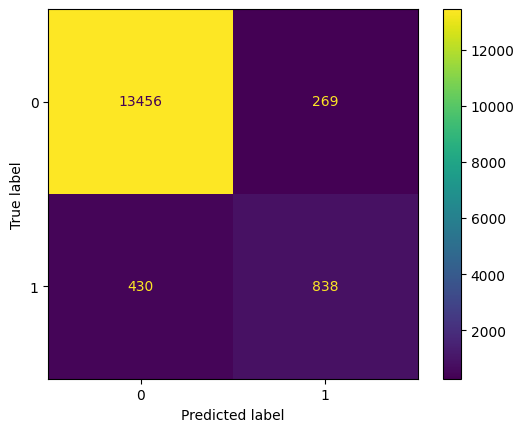

In [97]:
ConfusionMatrixDisplay.from_estimator(model, X_test_encoded, y_test)
plt.show()

### Attempt 2
* Logistic Regression and XGBoost
* Handling Class imbalance using Under sampling

In [101]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=101)
X_train_rus, y_train_rus = rus.fit_resample(X_train_encoded, y_train)
X_test_rus, y_test_rus = rus.fit_resample(X_test_encoded, y_test)
y_test_rus.value_counts()

default
0    1268
1    1268
Name: count, dtype: int64

### Random Search CV with Logistic Regression

In [100]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    'C': np.logspace(-4,4,20),
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'penalty': ['l1', 'l2', 'elasticnet', None]
}

model_lr = LogisticRegression(max_iter=1000)

random_search = RandomizedSearchCV(
    estimator= model_lr,
    param_distributions= params,
    n_iter= 50,
    scoring= 'f1',
    cv = 5,
    verbose= 2,
    random_state= 101
)

random_search.fit(X_train_rus, y_train_rus)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END C=0.615848211066026, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.615848211066026, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.615848211066026, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.615848211066026, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.615848211066026, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.012742749857031334, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.012742749857031334, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.012742749857031334, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.012742749857031334, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.012742749857031334, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .......C=1438.44988828766, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=1438.449888287

C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:497: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=3.05978e-19): result may not be accurate.
  warnings.warn(
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio p

[CV] END C=0.004832930238571752, penalty=None, solver=newton-cholesky; total time=   0.0s
[CV] END ......C=545.5594781168514, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=545.5594781168514, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=545.5594781168514, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=545.5594781168514, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=545.5594781168514, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=3792.690190732246, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END C=3792.690190732246, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END C=3792.690190732246, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END C=3792.690190732246, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END C=3792.690190732246, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END ...............C=0.0001, penalty=None, solver=lbfgs; total time=   0.0s

C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1

[CV] END ...............C=0.0001, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END ...............C=0.0001, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END ...............C=0.0001, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END .C=11.288378916846883, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=11.288378916846883, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=11.288378916846883, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=11.288378916846883, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=11.288378916846883, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....C=1438.44988828766, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END .....C=1438.44988828766, penalty=None, solver=lbfgs; total time=   0.0s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1

[CV] END .....C=1438.44988828766, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END .....C=1438.44988828766, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END .....C=1438.44988828766, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END ........C=1438.44988828766, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=1438.44988828766, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=1438.44988828766, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=1438.44988828766, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=1438.44988828766, penalty=l2, solver=saga; total time=   0.0s
[CV] END .....C=29.763514416313132, penalty=None, solver=sag; total time=   0.0s
[CV] END .....C=29.763514416313132, penalty=None, solver=sag; total time=   0.0s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=29.763514416313132, penalty=None, solver=sag; total time=   0.0s
[CV] END .....C=29.763514416313132, penalty=None, solver=sag; total time=   0.0s
[CV] END .....C=29.763514416313132, penalty=None, solver=sag; total time=   0.0s
[CV] END C=29.763514416313132, penalty=l1, solver=newton-cholesky; total time=   0.0s
[CV] END C=29.763514416313132, penalty=l1, solver=newton-cholesky; total time=   0.0s
[CV] END C=29.763514416313132, penalty=l1, solver=newton-cholesky; total time=   0.0s
[CV] END C=29.763514416313132, penalty=l1, solver=newton-cholesky; total time=   0.0s
[CV] END C=29.763514416313132, penalty=l1, solver=newton-cholesky; total time=   0.0s
[CV] END C=1438.44988828766, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=1438.44988828766, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=1438.44988828766, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=1438.44988828766, penalty=elasticnet, solver=saga; total time=   0.0s
[CV

C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1

[CV] END ...........C=0.0001, penalty=None, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.0001, penalty=None, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.0001, penalty=None, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.0001, penalty=None, solver=liblinear; total time=   0.0s
[CV] END C=0.23357214690901212, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.23357214690901212, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.23357214690901212, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.23357214690901212, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.23357214690901212, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....C=0.08858667904100823, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.08858667904100823, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.08858667904100823, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.08858667904

C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1

[CV] END ...C=0.23357214690901212, penalty=None, solver=saga; total time=   0.0s
[CV] END ...C=0.23357214690901212, penalty=None, solver=saga; total time=   0.0s
[CV] END ...C=0.23357214690901212, penalty=None, solver=saga; total time=   0.0s
[CV] END .C=11.288378916846883, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=11.288378916846883, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=11.288378916846883, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=11.288378916846883, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=11.288378916846883, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ....C=0.615848211066026, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.615848211066026, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.615848211066026, penalty=None, solver=lbfgs; total time=   0.0s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1

[CV] END ....C=0.615848211066026, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.615848211066026, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END C=0.08858667904100823, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.08858667904100823, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.08858667904100823, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.08858667904100823, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.08858667904100823, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.23357214690901212, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.23357214690901212, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.23357214690901212, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.23357214690901212, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.23357214690901212, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=11.28837891684688

C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:497: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=3.05978e-19): result may not be accurate.
  warnings.warn(
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio p

[CV] END .....C=78.47599703514607, penalty=None, solver=saga; total time=   0.0s
[CV] END .....C=78.47599703514607, penalty=None, solver=saga; total time=   0.0s
[CV] END C=0.004832930238571752, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.004832930238571752, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.004832930238571752, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.004832930238571752, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.004832930238571752, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=3792.690190732246, penalty=l1, solver=newton-cholesky; total time=   0.0s
[CV] END C=3792.690190732246, penalty=l1, solver=newton-cholesky; total time=   0.0s
[CV] END C=3792.690190732246, penalty=l1, solver=newton-cholesky; total time=   0.0s
[CV] END C=3792.690190732246, penalty=l1, solver=newton-cholesky; total time=   0.0s
[CV] END C=3792.690190732246, penalty=l1, solver=newton-cholesky; total time=   0.0s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
105 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Parker\AppData\Local\P

RandomizedSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_iter=50,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga']},
                   random_state=101, scoring='f1', verbose=2)

In [102]:
print(f"The best parameters = {random_search.best_params_}")
print(f"The best score = {random_search.best_score_}")

model = random_search.best_estimator_

y_pred = model.predict(X_test_rus)
print(classification_report(y_test_rus, y_pred))

The best parameters = {'solver': 'newton-cg', 'penalty': 'l2', 'C': 11.288378916846883}
The best score = 0.8893799400104374
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1268
           1       0.88      0.92      0.90      1268

    accuracy                           0.89      2536
   macro avg       0.89      0.89      0.89      2536
weighted avg       0.89      0.89      0.89      2536



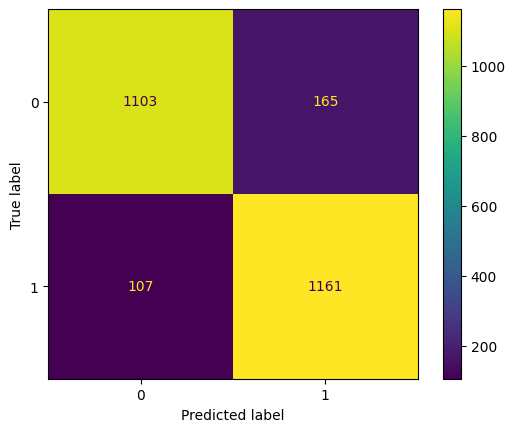

In [103]:
ConfusionMatrixDisplay.from_estimator(model, X_test_rus, y_test_rus)
plt.show()

### Random Search CV with XGBoost

In [104]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    # Maximum depth of the tree. Typical range: [3, 10]
    "max_depth": [3, 4, 5, 6, 7, 8, 9, 10],
    
    # Learning rate or shrinkage. Typical range: [0.01, 0.3]
    "learning_rate": [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    
    # Number of trees (boosting rounds). Typical range: [50, 500]
    "n_estimators": [50, 100, 150, 200, 300, 400, 500],
    
    # Minimum loss reduction required to make a split. Typical range: [0, 5]
    "gamma": [0, 0.1, 0.2, 0.5, 1, 2, 5],
    
    # Subsample ratio of the training instances. Typical range: [0.5, 1.0]
    "subsample": [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    
    # Fraction of features used for each tree. Typical range: [0.5, 1.0]
    "colsample_bytree": [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    
    # Minimum sum of instance weights for a child node. Typical range: [1, 10]
    "min_child_weight": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    
    # L2 regularization term on weights. Typical range: [0, 10]
    "lambda": [0, 0.1, 1, 2, 5, 10],
    
    # L1 regularization term on weights. Typical range: [0, 10]
    "alpha": [0, 0.1, 1, 2, 5, 10],
    
    # Tree method (if using GPU). Options: ['auto', 'exact', 'approx', 'hist', 'gpu_hist']
    "tree_method": ["auto", "exact", "approx", "hist", "gpu_hist"]
}


model_xgb = XGBClassifier()

random_search = RandomizedSearchCV(
    estimator= model_xgb,
    param_distributions= params,
    n_iter= 50,
    scoring= 'f1',
    cv = 5,
    verbose= 2,
    random_state= 101
)

random_search.fit(X_train_rus, y_train_rus)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END alpha=1, colsample_bytree=0.7, gamma=0.1, lambda=5, learning_rate=0.3, max_depth=5, min_child_weight=9, n_estimators=200, subsample=0.7, tree_method=hist; total time=   0.0s
[CV] END alpha=1, colsample_bytree=0.7, gamma=0.1, lambda=5, learning_rate=0.3, max_depth=5, min_child_weight=9, n_estimators=200, subsample=0.7, tree_method=hist; total time=   0.0s
[CV] END alpha=1, colsample_bytree=0.7, gamma=0.1, lambda=5, learning_rate=0.3, max_depth=5, min_child_weight=9, n_estimators=200, subsample=0.7, tree_method=hist; total time=   0.0s
[CV] END alpha=1, colsample_bytree=0.7, gamma=0.1, lambda=5, learning_rate=0.3, max_depth=5, min_child_weight=9, n_estimators=200, subsample=0.7, tree_method=hist; total time=   0.0s
[CV] END alpha=1, colsample_bytree=0.7, gamma=0.1, lambda=5, learning_rate=0.3, max_depth=5, min_child_weight=9, n_estimators=200, subsample=0.7, tree_method=hist; total time=   0.0s
[CV] END alpha=0.1, col

C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python

[CV] END alpha=2, colsample_bytree=0.5, gamma=1, lambda=0.1, learning_rate=0.15, max_depth=4, min_child_weight=4, n_estimators=200, subsample=0.6, tree_method=gpu_hist; total time=   0.5s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=2, colsample_bytree=0.5, gamma=1, lambda=0.1, learning_rate=0.15, max_depth=4, min_child_weight=4, n_estimators=200, subsample=0.6, tree_method=gpu_hist; total time=   0.3s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=2, colsample_bytree=0.5, gamma=1, lambda=0.1, learning_rate=0.15, max_depth=4, min_child_weight=4, n_estimators=200, subsample=0.6, tree_method=gpu_hist; total time=   0.3s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=2, colsample_bytree=0.5, gamma=1, lambda=0.1, learning_rate=0.15, max_depth=4, min_child_weight=4, n_estimators=200, subsample=0.6, tree_method=gpu_hist; total time=   0.3s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=2, colsample_bytree=0.5, gamma=1, lambda=0.1, learning_rate=0.15, max_depth=4, min_child_weight=4, n_estimators=200, subsample=0.6, tree_method=gpu_hist; total time=   0.3s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=10, colsample_bytree=0.9, gamma=0.1, lambda=1, learning_rate=0.25, max_depth=10, min_child_weight=8, n_estimators=200, subsample=0.5, tree_method=gpu_hist; total time=   0.3s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=10, colsample_bytree=0.9, gamma=0.1, lambda=1, learning_rate=0.25, max_depth=10, min_child_weight=8, n_estimators=200, subsample=0.5, tree_method=gpu_hist; total time=   0.3s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=10, colsample_bytree=0.9, gamma=0.1, lambda=1, learning_rate=0.25, max_depth=10, min_child_weight=8, n_estimators=200, subsample=0.5, tree_method=gpu_hist; total time=   0.4s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=10, colsample_bytree=0.9, gamma=0.1, lambda=1, learning_rate=0.25, max_depth=10, min_child_weight=8, n_estimators=200, subsample=0.5, tree_method=gpu_hist; total time=   0.3s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=10, colsample_bytree=0.9, gamma=0.1, lambda=1, learning_rate=0.25, max_depth=10, min_child_weight=8, n_estimators=200, subsample=0.5, tree_method=gpu_hist; total time=   0.3s
[CV] END alpha=1, colsample_bytree=0.5, gamma=2, lambda=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.9, tree_method=exact; total time=   0.2s
[CV] END alpha=1, colsample_bytree=0.5, gamma=2, lambda=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.9, tree_method=exact; total time=   0.2s
[CV] END alpha=1, colsample_bytree=0.5, gamma=2, lambda=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.9, tree_method=exact; total time=   0.2s
[CV] END alpha=1, colsample_bytree=0.5, gamma=2, lambda=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.9, tree_method=exact; total time=   0.2s
[CV] END alpha=1, colsample_bytree=0.5, gamma=2, lambda=0.1, learning_rate

C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python

[CV] END alpha=1, colsample_bytree=0.7, gamma=2, lambda=10, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, subsample=0.7, tree_method=gpu_hist; total time=   0.6s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=1, colsample_bytree=0.7, gamma=2, lambda=10, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, subsample=0.7, tree_method=gpu_hist; total time=   0.4s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=1, colsample_bytree=0.7, gamma=2, lambda=10, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, subsample=0.7, tree_method=gpu_hist; total time=   0.3s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=1, colsample_bytree=0.7, gamma=2, lambda=10, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, subsample=0.7, tree_method=gpu_hist; total time=   0.3s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=1, colsample_bytree=0.7, gamma=2, lambda=10, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=150, subsample=0.7, tree_method=gpu_hist; total time=   0.3s
[CV] END alpha=0.1, colsample_bytree=1.0, gamma=0.5, lambda=0.1, learning_rate=0.1, max_depth=10, min_child_weight=10, n_estimators=100, subsample=0.5, tree_method=auto; total time=   0.0s
[CV] END alpha=0.1, colsample_bytree=1.0, gamma=0.5, lambda=0.1, learning_rate=0.1, max_depth=10, min_child_weight=10, n_estimators=100, subsample=0.5, tree_method=auto; total time=   0.0s
[CV] END alpha=0.1, colsample_bytree=1.0, gamma=0.5, lambda=0.1, learning_rate=0.1, max_depth=10, min_child_weight=10, n_estimators=100, subsample=0.5, tree_method=auto; total time=   0.0s
[CV] END alpha=0.1, colsample_bytree=1.0, gamma=0.5, lambda=0.1, learning_rate=0.1, max_depth=10, min_child_weight=10, n_estimators=100, subsample=0.5, tree_method=auto; total time=   0.0s
[CV] END alpha=0.1, colsample_bytree=1.0, gamma=0.5, lamb

C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python

[CV] END alpha=10, colsample_bytree=0.9, gamma=0.5, lambda=0.1, learning_rate=0.15, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.8, tree_method=gpu_hist; total time=   0.3s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=10, colsample_bytree=0.9, gamma=0.5, lambda=0.1, learning_rate=0.15, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.8, tree_method=gpu_hist; total time=   0.3s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=10, colsample_bytree=0.9, gamma=0.5, lambda=0.1, learning_rate=0.15, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.8, tree_method=gpu_hist; total time=   0.3s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=10, colsample_bytree=0.9, gamma=0.5, lambda=0.1, learning_rate=0.15, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.8, tree_method=gpu_hist; total time=   0.3s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=10, colsample_bytree=0.9, gamma=0.5, lambda=0.1, learning_rate=0.15, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.8, tree_method=gpu_hist; total time=   0.3s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=0.1, colsample_bytree=1.0, gamma=0.5, lambda=0, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=50, subsample=0.9, tree_method=gpu_hist; total time=   0.1s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=0.1, colsample_bytree=1.0, gamma=0.5, lambda=0, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=50, subsample=0.9, tree_method=gpu_hist; total time=   0.1s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=0.1, colsample_bytree=1.0, gamma=0.5, lambda=0, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=50, subsample=0.9, tree_method=gpu_hist; total time=   0.1s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=0.1, colsample_bytree=1.0, gamma=0.5, lambda=0, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=50, subsample=0.9, tree_method=gpu_hist; total time=   0.1s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=0.1, colsample_bytree=1.0, gamma=0.5, lambda=0, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=50, subsample=0.9, tree_method=gpu_hist; total time=   0.1s
[CV] END alpha=2, colsample_bytree=0.9, gamma=0.1, lambda=0.1, learning_rate=0.05, max_depth=5, min_child_weight=9, n_estimators=400, subsample=0.6, tree_method=auto; total time=   0.1s
[CV] END alpha=2, colsample_bytree=0.9, gamma=0.1, lambda=0.1, learning_rate=0.05, max_depth=5, min_child_weight=9, n_estimators=400, subsample=0.6, tree_method=auto; total time=   0.2s
[CV] END alpha=2, colsample_bytree=0.9, gamma=0.1, lambda=0.1, learning_rate=0.05, max_depth=5, min_child_weight=9, n_estimators=400, subsample=0.6, tree_method=auto; total time=   0.1s
[CV] END alpha=2, colsample_bytree=0.9, gamma=0.1, lambda=0.1, learning_rate=0.05, max_depth=5, min_child_weight=9, n_estimators=400, subsample=0.6, tree_method=auto; total time=   0.2s
[CV] END alpha=2, colsample_bytree=0.9, gamma=0.1, lambda=0.1, learn

C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python

[CV] END alpha=10, colsample_bytree=0.5, gamma=5, lambda=5, learning_rate=0.05, max_depth=8, min_child_weight=6, n_estimators=100, subsample=0.8, tree_method=gpu_hist; total time=   0.2s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=10, colsample_bytree=0.5, gamma=5, lambda=5, learning_rate=0.05, max_depth=8, min_child_weight=6, n_estimators=100, subsample=0.8, tree_method=gpu_hist; total time=   0.2s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=10, colsample_bytree=0.5, gamma=5, lambda=5, learning_rate=0.05, max_depth=8, min_child_weight=6, n_estimators=100, subsample=0.8, tree_method=gpu_hist; total time=   0.2s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=10, colsample_bytree=0.5, gamma=5, lambda=5, learning_rate=0.05, max_depth=8, min_child_weight=6, n_estimators=100, subsample=0.8, tree_method=gpu_hist; total time=   0.2s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=10, colsample_bytree=0.5, gamma=5, lambda=5, learning_rate=0.05, max_depth=8, min_child_weight=6, n_estimators=100, subsample=0.8, tree_method=gpu_hist; total time=   0.1s
[CV] END alpha=5, colsample_bytree=0.5, gamma=0, lambda=5, learning_rate=0.25, max_depth=7, min_child_weight=7, n_estimators=400, subsample=0.6, tree_method=hist; total time=   0.1s
[CV] END alpha=5, colsample_bytree=0.5, gamma=0, lambda=5, learning_rate=0.25, max_depth=7, min_child_weight=7, n_estimators=400, subsample=0.6, tree_method=hist; total time=   0.1s
[CV] END alpha=5, colsample_bytree=0.5, gamma=0, lambda=5, learning_rate=0.25, max_depth=7, min_child_weight=7, n_estimators=400, subsample=0.6, tree_method=hist; total time=   0.1s
[CV] END alpha=5, colsample_bytree=0.5, gamma=0, lambda=5, learning_rate=0.25, max_depth=7, min_child_weight=7, n_estimators=400, subsample=0.6, tree_method=hist; total time=   0.1s
[CV] END alpha=5, colsample_bytree=0.5, gamma=0, lambda=5, learning_rate=0.25, max_de

C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python

[CV] END alpha=1, colsample_bytree=0.9, gamma=0.2, lambda=0.1, learning_rate=0.01, max_depth=6, min_child_weight=4, n_estimators=300, subsample=0.6, tree_method=gpu_hist; total time=   1.0s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=1, colsample_bytree=0.9, gamma=0.2, lambda=0.1, learning_rate=0.01, max_depth=6, min_child_weight=4, n_estimators=300, subsample=0.6, tree_method=gpu_hist; total time=   0.8s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=1, colsample_bytree=0.9, gamma=0.2, lambda=0.1, learning_rate=0.01, max_depth=6, min_child_weight=4, n_estimators=300, subsample=0.6, tree_method=gpu_hist; total time=   0.8s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=1, colsample_bytree=0.9, gamma=0.2, lambda=0.1, learning_rate=0.01, max_depth=6, min_child_weight=4, n_estimators=300, subsample=0.6, tree_method=gpu_hist; total time=   0.8s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=1, colsample_bytree=0.9, gamma=0.2, lambda=0.1, learning_rate=0.01, max_depth=6, min_child_weight=4, n_estimators=300, subsample=0.6, tree_method=gpu_hist; total time=   0.8s
[CV] END alpha=2, colsample_bytree=0.5, gamma=0.2, lambda=0.1, learning_rate=0.05, max_depth=6, min_child_weight=4, n_estimators=100, subsample=0.7, tree_method=exact; total time=   0.1s
[CV] END alpha=2, colsample_bytree=0.5, gamma=0.2, lambda=0.1, learning_rate=0.05, max_depth=6, min_child_weight=4, n_estimators=100, subsample=0.7, tree_method=exact; total time=   0.1s
[CV] END alpha=2, colsample_bytree=0.5, gamma=0.2, lambda=0.1, learning_rate=0.05, max_depth=6, min_child_weight=4, n_estimators=100, subsample=0.7, tree_method=exact; total time=   0.1s
[CV] END alpha=2, colsample_bytree=0.5, gamma=0.2, lambda=0.1, learning_rate=0.05, max_depth=6, min_child_weight=4, n_estimators=100, subsample=0.7, tree_method=exact; total time=   0.1s
[CV] END alpha=2, colsample_bytree=0.5, gamma=0.2, lambda=0.1,

C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python

[CV] END alpha=2, colsample_bytree=0.8, gamma=0.5, lambda=1, learning_rate=0.2, max_depth=10, min_child_weight=2, n_estimators=400, subsample=0.7, tree_method=gpu_hist; total time=   0.7s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=2, colsample_bytree=0.8, gamma=0.5, lambda=1, learning_rate=0.2, max_depth=10, min_child_weight=2, n_estimators=400, subsample=0.7, tree_method=gpu_hist; total time=   0.8s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=2, colsample_bytree=0.8, gamma=0.5, lambda=1, learning_rate=0.2, max_depth=10, min_child_weight=2, n_estimators=400, subsample=0.7, tree_method=gpu_hist; total time=   0.7s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=2, colsample_bytree=0.8, gamma=0.5, lambda=1, learning_rate=0.2, max_depth=10, min_child_weight=2, n_estimators=400, subsample=0.7, tree_method=gpu_hist; total time=   0.8s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:19:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=2, colsample_bytree=0.8, gamma=0.5, lambda=1, learning_rate=0.2, max_depth=10, min_child_weight=2, n_estimators=400, subsample=0.7, tree_method=gpu_hist; total time=   0.8s
[CV] END alpha=10, colsample_bytree=1.0, gamma=1, lambda=10, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=200, subsample=0.7, tree_method=approx; total time=   0.2s
[CV] END alpha=10, colsample_bytree=1.0, gamma=1, lambda=10, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=200, subsample=0.7, tree_method=approx; total time=   0.2s
[CV] END alpha=10, colsample_bytree=1.0, gamma=1, lambda=10, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=200, subsample=0.7, tree_method=approx; total time=   0.2s
[CV] END alpha=10, colsample_bytree=1.0, gamma=1, lambda=10, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=200, subsample=0.7, tree_method=approx; total time=   0.2s
[CV] END alpha=10, colsample_bytree=1.0, gamma=1, lambda=10, learnin

C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:20:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:20:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python

[CV] END alpha=2, colsample_bytree=0.5, gamma=0.5, lambda=0.1, learning_rate=0.2, max_depth=10, min_child_weight=7, n_estimators=300, subsample=0.9, tree_method=gpu_hist; total time=   0.8s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:20:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:20:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=2, colsample_bytree=0.5, gamma=0.5, lambda=0.1, learning_rate=0.2, max_depth=10, min_child_weight=7, n_estimators=300, subsample=0.9, tree_method=gpu_hist; total time=   0.6s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:20:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:20:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=2, colsample_bytree=0.5, gamma=0.5, lambda=0.1, learning_rate=0.2, max_depth=10, min_child_weight=7, n_estimators=300, subsample=0.9, tree_method=gpu_hist; total time=   0.5s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:20:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:20:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=2, colsample_bytree=0.5, gamma=0.5, lambda=0.1, learning_rate=0.2, max_depth=10, min_child_weight=7, n_estimators=300, subsample=0.9, tree_method=gpu_hist; total time=   0.5s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:20:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=2, colsample_bytree=0.5, gamma=0.5, lambda=0.1, learning_rate=0.2, max_depth=10, min_child_weight=7, n_estimators=300, subsample=0.9, tree_method=gpu_hist; total time=   0.5s
[CV] END alpha=10, colsample_bytree=0.9, gamma=5, lambda=0.1, learning_rate=0.2, max_depth=8, min_child_weight=9, n_estimators=100, subsample=0.8, tree_method=hist; total time=   0.0s
[CV] END alpha=10, colsample_bytree=0.9, gamma=5, lambda=0.1, learning_rate=0.2, max_depth=8, min_child_weight=9, n_estimators=100, subsample=0.8, tree_method=hist; total time=   0.0s
[CV] END alpha=10, colsample_bytree=0.9, gamma=5, lambda=0.1, learning_rate=0.2, max_depth=8, min_child_weight=9, n_estimators=100, subsample=0.8, tree_method=hist; total time=   0.0s
[CV] END alpha=10, colsample_bytree=0.9, gamma=5, lambda=0.1, learning_rate=0.2, max_depth=8, min_child_weight=9, n_estimators=100, subsample=0.8, tree_method=hist; total time=   0.0s
[CV] END alpha=10, colsample_bytree=0.9, gamma=5, lambda=0.1, learning_rat

C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:20:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:20:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python

[CV] END alpha=0.1, colsample_bytree=0.6, gamma=0.2, lambda=5, learning_rate=0.3, max_depth=10, min_child_weight=5, n_estimators=300, subsample=1.0, tree_method=gpu_hist; total time=   0.8s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:20:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:20:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=0.1, colsample_bytree=0.6, gamma=0.2, lambda=5, learning_rate=0.3, max_depth=10, min_child_weight=5, n_estimators=300, subsample=1.0, tree_method=gpu_hist; total time=   0.5s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:20:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:20:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=0.1, colsample_bytree=0.6, gamma=0.2, lambda=5, learning_rate=0.3, max_depth=10, min_child_weight=5, n_estimators=300, subsample=1.0, tree_method=gpu_hist; total time=   0.5s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:20:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:20:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=0.1, colsample_bytree=0.6, gamma=0.2, lambda=5, learning_rate=0.3, max_depth=10, min_child_weight=5, n_estimators=300, subsample=1.0, tree_method=gpu_hist; total time=   0.5s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:20:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=0.1, colsample_bytree=0.6, gamma=0.2, lambda=5, learning_rate=0.3, max_depth=10, min_child_weight=5, n_estimators=300, subsample=1.0, tree_method=gpu_hist; total time=   0.5s
[CV] END alpha=5, colsample_bytree=0.5, gamma=0.2, lambda=1, learning_rate=0.15, max_depth=8, min_child_weight=9, n_estimators=50, subsample=0.5, tree_method=auto; total time=   0.0s
[CV] END alpha=5, colsample_bytree=0.5, gamma=0.2, lambda=1, learning_rate=0.15, max_depth=8, min_child_weight=9, n_estimators=50, subsample=0.5, tree_method=auto; total time=   0.0s
[CV] END alpha=5, colsample_bytree=0.5, gamma=0.2, lambda=1, learning_rate=0.15, max_depth=8, min_child_weight=9, n_estimators=50, subsample=0.5, tree_method=auto; total time=   0.0s
[CV] END alpha=5, colsample_bytree=0.5, gamma=0.2, lambda=1, learning_rate=0.15, max_depth=8, min_child_weight=9, n_estimators=50, subsample=0.5, tree_method=auto; total time=   0.0s
[CV] END alpha=5, colsample_bytree=0.5, gamma=0.2, lambda=1, learning_rate=0.1

C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:20:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:20:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python

[CV] END alpha=10, colsample_bytree=0.7, gamma=0.2, lambda=0, learning_rate=0.25, max_depth=4, min_child_weight=6, n_estimators=400, subsample=0.7, tree_method=gpu_hist; total time=   0.4s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:20:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:20:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=10, colsample_bytree=0.7, gamma=0.2, lambda=0, learning_rate=0.25, max_depth=4, min_child_weight=6, n_estimators=400, subsample=0.7, tree_method=gpu_hist; total time=   0.5s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:20:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:20:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=10, colsample_bytree=0.7, gamma=0.2, lambda=0, learning_rate=0.25, max_depth=4, min_child_weight=6, n_estimators=400, subsample=0.7, tree_method=gpu_hist; total time=   0.5s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:20:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:20:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=10, colsample_bytree=0.7, gamma=0.2, lambda=0, learning_rate=0.25, max_depth=4, min_child_weight=6, n_estimators=400, subsample=0.7, tree_method=gpu_hist; total time=   0.5s


C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:20:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[CV] END alpha=10, colsample_bytree=0.7, gamma=0.2, lambda=0, learning_rate=0.25, max_depth=4, min_child_weight=6, n_estimators=400, subsample=0.7, tree_method=gpu_hist; total time=   0.5s
[CV] END alpha=1, colsample_bytree=0.6, gamma=0.2, lambda=2, learning_rate=0.2, max_depth=3, min_child_weight=8, n_estimators=500, subsample=0.9, tree_method=exact; total time=   0.5s
[CV] END alpha=1, colsample_bytree=0.6, gamma=0.2, lambda=2, learning_rate=0.2, max_depth=3, min_child_weight=8, n_estimators=500, subsample=0.9, tree_method=exact; total time=   0.4s
[CV] END alpha=1, colsample_bytree=0.6, gamma=0.2, lambda=2, learning_rate=0.2, max_depth=3, min_child_weight=8, n_estimators=500, subsample=0.9, tree_method=exact; total time=   0.4s
[CV] END alpha=1, colsample_bytree=0.6, gamma=0.2, lambda=2, learning_rate=0.2, max_depth=3, min_child_weight=8, n_estimators=500, subsample=0.9, tree_method=exact; total time=   0.4s
[CV] END alpha=1, colsample_bytree=0.6, gamma=0.2, lambda=2, learning_rate=

C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:20:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                        'gamma': [0, 0.1, 0.2, 0.5, 1, 2, 5],
                                        'lambda': [0, 0.1, 1, 2, 5, 10],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.15,
                                                          0.2, 0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                                        'min_child_weight': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'n_estimators': [50, 100, 150, 200, 300,
                                                         400, 500],
                                        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9,
                                                      1.0],
                                        'tree_method': ['auto', 'exact',
                                                        'approx', 'hist',
                                                        'gpu_hist']},
                   random_state=101, scoring='f1', verbose=2)

In [105]:
print(f"The best parameters = {random_search.best_params_}")
print(f"The best score = {random_search.best_score_}")

model = random_search.best_estimator_

y_pred = model.predict(X_test_rus)
print(classification_report(y_test_rus, y_pred))

The best parameters = {'tree_method': 'gpu_hist', 'subsample': 0.6, 'n_estimators': 200, 'min_child_weight': 4, 'max_depth': 4, 'learning_rate': 0.15, 'lambda': 0.1, 'gamma': 1, 'colsample_bytree': 0.5, 'alpha': 2}
The best score = 0.9055484817131436
              precision    recall  f1-score   support

           0       0.93      0.90      0.91      1268
           1       0.90      0.93      0.92      1268

    accuracy                           0.91      2536
   macro avg       0.91      0.91      0.91      2536
weighted avg       0.91      0.91      0.91      2536



C:\Users\Parker\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:20:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


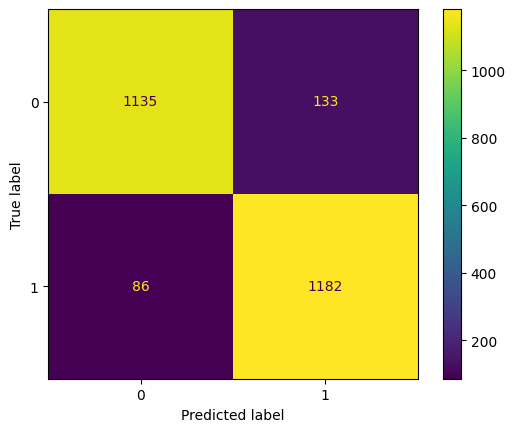

In [106]:
ConfusionMatrixDisplay.from_estimator(model, X_test_rus, y_test_rus)
plt.show()

### Attempt 3 with SMOTE Tomek
* Using Linear Regression and XGBoost
* We will use SMOTE Tomek links

In [107]:
from imblearn.combine import SMOTETomek

In [108]:
smote_tk = SMOTETomek(random_state=101)
X_train_smote_tk, y_train_smote_tk = smote_tk.fit_resample(X_train_encoded, y_train)
X_test_smote_tk, y_test_smote_tk = smote_tk.fit_resample(X_test_encoded, y_test)

# Logistic Regression with SMOTE Tomek

In [111]:
model = LogisticRegression()
model.fit(X_train_smote_tk, y_train_smote_tk)

y_pred = model.predict(X_test_smote_tk)

print(classification_report(y_test_smote_tk, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90     13686
           1       0.88      0.93      0.90     13686

    accuracy                           0.90     27372
   macro avg       0.90      0.90      0.90     27372
weighted avg       0.90      0.90      0.90     27372



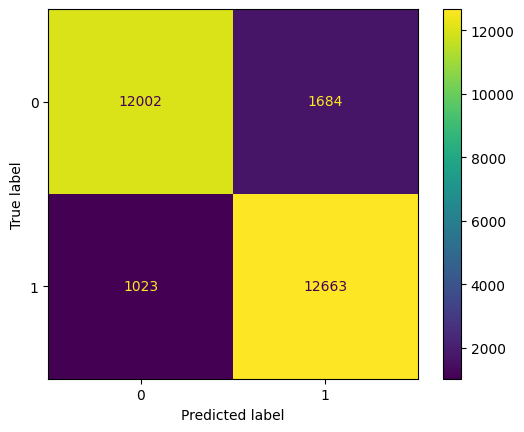

In [113]:
ConfusionMatrixDisplay.from_estimator(model, X_test_smote_tk, y_test_smote_tk)
plt.show()

# XGBoost with SMOTE Tomek

In [114]:
model = XGBClassifier()
model.fit(X_train_smote_tk, y_train_smote_tk)

y_pred = model.predict(X_test_smote_tk)

print(classification_report(y_test_smote_tk, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95     13686
           1       0.96      0.94      0.95     13686

    accuracy                           0.95     27372
   macro avg       0.95      0.95      0.95     27372
weighted avg       0.95      0.95      0.95     27372



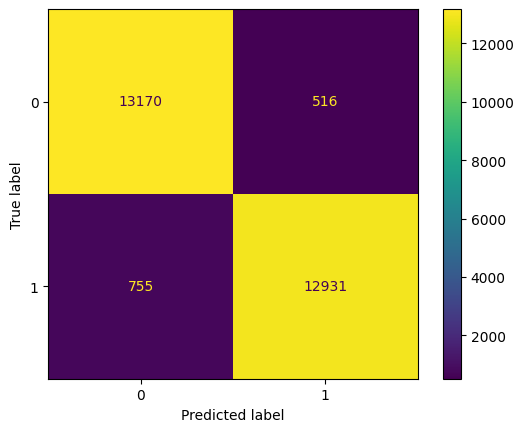

In [115]:
ConfusionMatrixDisplay.from_estimator(model, X_test_smote_tk, y_test_smote_tk)
plt.show()